### Simple Machine Learning Practice
- Follow a few kernels on writing and reading Python
- Haven't worked on DS in awhile so I will need a refresher
- Convert my R code to Python for more practice..?

### Content
- Following Kaggle kernels so if you see similar code then it probably is
    - Practice familiarizing myself with Python code and flow and not accuracy
- Data Summary
- Gather Data
- Import libraries
- Preprocessing data
- Cleaning data
- Explore the data
- Statistical Analysis
- Model the data
- Tune the data (Maybe)
    - Hyperparameter selection
    - Feature selection
- Validation
- Conclusion

### Areas of Study
- Modeling Framework
- Classification Problem
- Python Programming

In [1]:
# Set directory for the data
import os
path = 'C:\\Users\\' + os.getlogin() + '\\Documents\\Programming\\Python\\MachineLearning\\Data'
os.chdir(path)
os.getcwd()
os.listdir()

['01-ign.csv',
 '02-winequality-red.csv',
 '02-winequality-white.csv',
 '03-thanksgiving-2015-poll-data.csv',
 '05-ibm-sales-loss.csv',
 '07-test.csv',
 '07-train.csv']

In [2]:
# Load environment and check for versions
import sys
print('Python version: {}'.format(sys.version))

import pandas as pd
print('pandas version: {}'.format(pd.__version__))

import numpy as np
print('NumPy version: {}'.format(np.__version__))

import matplotlib as mpl
print('matplotlib version: {}'.format(mpl.__version__))

import IPython
from IPython import display
print("IPython version: {}". format(IPython.__version__)) 

import sklearn
print("scikit-learn version: {}". format(sklearn.__version__))

import scipy as sp
print("SciPy version: {}". format(sp.__version__)) 

# Other libraries
import random
import time
import warnings
warnings.filterwarnings('ignore')
print('-'*30)

Python version: 3.7.3 (v3.7.3:ef4ec6ed12, Mar 25 2019, 22:22:05) [MSC v.1916 64 bit (AMD64)]
pandas version: 0.24.2
NumPy version: 1.16.3
matplotlib version: 3.1.0
IPython version: 7.5.0
scikit-learn version: 0.21.2
SciPy version: 1.3.0
------------------------------


### Load data modeling libraries

In [3]:
# Load model algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# Common model helpers
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure matplotlib in Jupyter
%matplotlib inline
sns.set_style('white')
# pylab.rcParams['figure.figsize'] = 12,8

print('Importing libraries...')

Importing libraries...


### Opening the data and gathering summary level analysis

#### Data column descriptions

1. The Survived variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables. It's important to note, more predictor variables do not make a better model, but the right variables.
2. The PassengerID and Ticket variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.
3. The Pclass variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.
4. The Name variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.
5. The Sex and Embarked variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.
6. The Age and Fare variable are continuous quantitative datatypes.
7. The SibSp represents number of related siblings/spouse aboard and Parch represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is The Cabin variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is excluded from analysis.


In [4]:
# Import the train and test data
train = pd.read_csv('07-train.csv')
test = pd.read_csv('07-test.csv')

# Copy train data
train_cp = train.copy(deep=True)

In [5]:
# Describe the training data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Show first 5 rows of the dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Show last 5 rows of the dataset
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
train.index

RangeIndex(start=0, stop=891, step=1)

In [9]:
# Get shape (dimension) of training data
train.shape

(891, 12)

In [10]:
# Get column names
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### The dependent variable is 'Survived'
- Survival Count = 342
- Non-Survival Count = 549

In [11]:
# Get survival count by using value_count - a series method so to apply to a dataframe, must subset
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
# Describe the training data with argument 'all' for the parameter include
# List of data types to be included while describing dataframe. Default is None
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Leader, Dr. Alice (Farnham)",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Always check for NULL values

#### Using df.isnull() then summing it with .sum()

In [15]:
print('Train rows with null values:\n', train.isnull().sum())
print('-'*50)

Train rows with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------------------


In [16]:
print('Test rows with null values:\n', test.isnull().sum())
print('-'*50)

Test rows with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
--------------------------------------------------


#### Cleaning up the null values

There are several methods on how to handle missing values. There are always some instance where a particular element is absent. It could be due to corrupt data, failure to load the information, never inputted, and more. So understanding a couple methods in handling the NULL/NaN values are crucial. Pandas provides a dropna() function that can be used to drop either columns or rows with missing data.

Some methods are listed below:

1. Removing the rows with missing values using dropna() function
    - inplace parameter: If True, do operation inplace and return None.
    - axis parameter: drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’)
2. Impute the missing values using fillna():
    - Constant value that has meaning within the domain; ex: 0 for not present
    - Value from another randomly selected record (could be random or have the business acumen to figure out a value)
    - Mean, median, mode
    - Value estimated by a predictive model
3. Binning
    - Binning the values that are not present which could provide insight
4. Ignore and leave it as it is

In [17]:
# Get imputed values first so we can apply it to the test set as well
train_age_median = train['Age'].median()
train_embarked_mode = train['Embarked'].mode()
train_fare_median = train['Fare'].median()

impute_list = ['Age', 'Embarked', 'Fare']

#Loop through missing values in the training set and fillna() missing values
for col in impute_list:
    if train[col].dtypes in ['int64', 'float64', 'int32', 'float32']:
        
        # age with median
        print('Replacing missing values in ' + str(col) + '...')
        train[col].fillna(train[col].median(), inplace=True)
        
        # fare with median
        train[col].fillna(train[col].median(), inplace=True)
        
    else:
        print('-'*10)
        # embarked with mode
        print('Replacing missing values in ' + str(col) + '...')
        train[col].fillna(train[col].mode(), inplace=True)

Replacing missing values in Age...
----------
Replacing missing values in Embarked...
Replacing missing values in Fare...


In [18]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
# Check null values again for train
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Feature engineering

In [20]:
# Create a new feature called FamilySize
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# Create a new feature called IsAlone
train['IsAlone'] = 1
train['IsAlone'].loc[train['FamilySize'] > 1] = 0

# Create a new feature called title
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')

In [21]:
# train.loc[,['FamilySize', 'IsAlone', 'Title']].head()
train.loc[1:5].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,1,1,Mr


In [22]:
train.iloc[1:5].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr


In [23]:
train[['FamilySize', 'IsAlone', 'Title']].head()

,FamilySize,IsAlone,Title
0,2,0,Mr
1,2,0,Mrs
2,1,1,Miss
3,2,0,Mrs
4,1,1,Mr


In [24]:
type(train)

pandas.core.frame.DataFrame

In [25]:
##### Create a test df to make sure my functions are working properly
combine = train.copy()

combine['Title'] = combine['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
combine['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [26]:
# Use pd.crosstab() to generate frequency for multiple features
pd.crosstab(combine['Title'], combine['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [27]:
type(pd.crosstab(combine['Title'], combine['Survived']))

pandas.core.frame.DataFrame

In [28]:
# Instead of pd.crosstab(col1, col2), use value_counts() to create a frequency table
combine['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Countess      1
Jonkheer      1
Mme           1
Sir           1
Capt          1
Lady          1
Ms            1
Name: Title, dtype: int64

In [29]:
# Frequency table for column 'Sex'
combine['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [30]:
# Use .qcut() to bin and discretized values into more evenly distributed bins
combine['FareBin'] = pd.qcut(combine['Fare'], 4)
train['FareBin'] = pd.qcut(train['Fare'], 4)

In [31]:
# Group titles together
female_list = ['Countess', 'Lady', 'Miss', 'Mlle', 'Mme', 'Mrs', 'Ms']
royal_list = ['Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Sir', 'Master']
male_list = ['Capt', 'Mr', 'Rev']

train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Countess      1
Jonkheer      1
Mme           1
Sir           1
Capt          1
Lady          1
Ms            1
Name: Title, dtype: int64

In [32]:
train[train['Title'].isin(male_list)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr,"(-0.001, 7.91]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr,"(7.91, 14.454]"
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,1,1,Mr,"(7.91, 14.454]"
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1,Mr,"(31.0, 512.329]"
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,1,1,Mr,"(7.91, 14.454]"
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,7,0,Mr,"(31.0, 512.329]"
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,NaN,S,1,1,Mr,"(7.91, 14.454]"
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S,1,1,Mr,"(14.454, 31.0]"
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,1,1,Mr,"(7.91, 14.454]"
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,1,1,Mr,"(31.0, 512.329]"


In [33]:
train[train['Title'].isin(royal_list)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,FareBin
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,5,0,Master,"(14.454, 31.0]"
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,6,0,Master,"(14.454, 31.0]"
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.00,0,0,PC 17601,27.7208,NaN,C,1,1,Don,"(14.454, 31.0]"
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S,6,0,Master,"(31.0, 512.329]"
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S,8,0,Master,"(31.0, 512.329]"
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S,6,0,Master,"(14.454, 31.0]"
65,66,1,3,"Moubarek, Master. Gerios",male,28.00,1,1,2661,15.2458,NaN,C,3,0,Master,"(14.454, 31.0]"
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,3,0,Master,"(14.454, 31.0]"
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C,2,0,Master,"(7.91, 14.454]"
159,160,0,3,"Sage, Master. Thomas Henry",male,28.00,8,2,CA. 2343,69.5500,NaN,S,11,0,Master,"(31.0, 512.329]"


In [34]:
# Frequency table for royal list titles
train[train['Title'].isin(royal_list)]['Title'].value_counts()

Master      40
Dr           7
Col          2
Major        2
Jonkheer     1
Sir          1
Don          1
Name: Title, dtype: int64

In [35]:
# Frequency table for male list titles
train[train['Title'].isin(male_list)]['Title'].value_counts()

Mr      517
Rev       6
Capt      1
Name: Title, dtype: int64

In [36]:
# Frequency table for female list titles
train[train['Title'].isin(female_list)]['Title'].value_counts()

Miss        182
Mrs         125
Mlle          2
Ms            1
Mme           1
Lady          1
Countess      1
Name: Title, dtype: int64

In [37]:
train[train['Title'].isin(royal_list)]['Title'].isin(royal_list).head()

7     True
16    True
30    True
50    True
59    True
Name: Title, dtype: bool

In [38]:
# Create new feature for grouped titles
train['NewTitle'] = train['Title']

def title_change(df, title_list, new_title):
    for i in df['Title']:
        if df['Title'].isin(title_list)[i]:
            print('Updating titles...')


In [39]:
train['Title'].isin(royal_list).head()

0    False
1    False
2    False
3    False
4    False
Name: Title, dtype: bool

In [40]:
train['Title'][1]

'Mrs'

In [41]:
train['Title'].isin(royal_list)[1]

False

In [42]:
# Update new titles
train.loc[(train['Title'].isin(female_list)), 'NewTitle'] = 'Female'
train.loc[(train['Title'].isin(male_list)), 'NewTitle'] = 'Male'
train.loc[(train['Title'].isin(royal_list)), 'NewTitle'] = 'Rare'

train['NewTitle'].value_counts()

Male      524
Female    313
Rare       54
Name: NewTitle, dtype: int64

# Part 2 -----------------------------------------------------------------------------

In [43]:
# Import the train and test data
import pandas as pd
ntrain = pd.read_csv('07-train.csv')
ntest = pd.read_csv('07-test.csv')

In [44]:
# Peek the datasets
ntrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
ntest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
# Get shape and info of the columns
print('shape: ' + str(ntrain.shape))
print(ntrain.info())

shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


### Data Types

#### Categorical

Nominal
- variables that have two or more categories but no order
    - cabin, embarked

Dichotomous
- nominal variables with only two categories
    - sex

Ordinal
- variables that have two or more categories that can be ordered or ranked

#### Numeric

Discrete
- variables that have is a number with that is finite and can only take on certain values
    - passenger id, sibsp, parch, survived

Continuous
- variables that is a number that can take on any value within a range
    - age
    - fare
    
#### Text

Strings
- data in various forms of text and numbers
    - ticket
    - name

In [47]:
# Data info again
print ("*"*40)
print('********** train shape: ' + str(ntrain.shape) + '*'*10)
print (ntrain.info())
print ("*"*40)
print('********** test shape: ' + str(ntest.shape) + '*'*10)
print (ntest.info())

****************************************
********** train shape: (891, 12)**********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
****************************************
********** test shape: (418, 11)**********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null objec

### Preprocessing - missing values

#### Missing values in the ntrain set

In [48]:
# Create a variable to get null and index using the new variable and count.sum
totalnull = ntrain.isnull().sum().sort_values(ascending=False)

In [49]:
totalnull

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [50]:
percentnull = round(ntrain.isnull().sum().sort_values(ascending=False)/len(ntrain)*100,2)
percentnull

Cabin          77.10
Age            19.87
Embarked        0.22
Fare            0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
Survived        0.00
PassengerId     0.00
dtype: float64

In [51]:
# Combine the null variables horizontally so axis=1
pd.concat([totalnull, percentnull], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


#### Missing values in the ntest set

In [52]:
# Get totals and percentages of nulls in the ntest set
totalnull_test = ntest.isnull().sum().sort_values(ascending=False)
percentnull_test = round(ntest.isnull().sum().sort_values(ascending=False)/len(ntest)*100, 2)

# Combine using axis=1 for horizontal merges
pd.concat([totalnull_test, percentnull_test], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


#### Embarked

In [53]:
# Create a df and get values in the embarked feature and percentages using value_count()
embarked_total = pd.DataFrame(ntrain.Embarked.value_counts(dropna=False))
embarked_percent = pd.DataFrame(round(ntrain.Embarked.value_counts(dropna=False, normalize=True)*100, 2))

# Rename columns
embarked_total.columns = ['Total']
embarked_percent.columns = ['Percent']

# Merge the two dataframes into one using axis=1 for horizontal merge
pd.concat([embarked_total, embarked_percent], axis=1)

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [54]:
print(type(totalnull_test))
print(type(embarked_total))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [55]:
# View the nulls
ntrain[ntrain.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### Embarked locations
C = Cherbourg, Q = Queenstown, S = Southampton

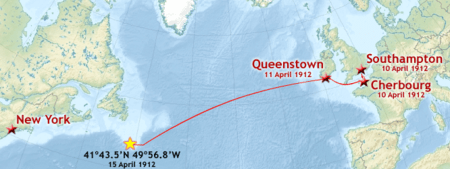

In [56]:
from IPython.display import Image
url = 'https://i0.wp.com/upload.wikimedia.org/wikipedia/commons/thumb/5/51/Titanic_voyage_map.png/450px-Titanic_voyage_map.png'
Image(url,width=600, height=800)

### Assigning 'C' did not work below.

In [57]:
# Setting embarked nulls to Cherbourg based on survival rate, gender, and fare (both from the same cabin)
ntrain[ntrain.Embarked.isnull()].loc['Embarked'] = 'C'

In [58]:
null_embarked = ntrain[['Embarked']].isnull().head() # = 'C'
null_embarked.head()

,Embarked
0,False
1,False
2,False
3,False
4,False


In [59]:
ntrain[ntrain.Embarked.isnull()].Embarked

61     NaN
829    NaN
Name: Embarked, dtype: object

In [60]:
ntrain2 = ntrain.copy()

In [61]:
# Trying to see if replacing nulls is similar to R...
ntrain2[null_embarked][['Embarked']] = 'C'

In [62]:
ntrain2.Embarked.isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: Embarked, dtype: bool

In [63]:
# Result: Nope or i'm probably doing it wrong
ntrain2.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [64]:
# Get totals and percentages of nulls in the ntrain set
totalnull = ntrain.isnull().sum().sort_values(ascending=False)
percentnull = round(ntrain.isnull().sum().sort_values(ascending=False)/len(ntrain)*100, 2)

# Combine using axis=1 for horizontal merges
pd.concat([totalnull, percentnull], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [65]:
# Create a table of survived vs. embarked
embarked_survival = pd.crosstab(index=ntrain['Embarked'],
                               columns=ntrain['Survived'])

# Set names for index and columns if needed
# embarked_survival.columns = ["Did not Survive", "Survived"]
# embarked_survival.index= ["C","Q", "S"]

embarked_survival

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


#### pd.crosstab(df.A,df.B, normalize='index')
crosstab with percentages using normalize parameter?
- index: rows
- columns
- all

#### Include totals using margins() parameter and passing True as the argument

In [66]:
# Create a table of survived vs. embarked
embarked_survival = pd.crosstab(index=ntrain['Embarked'],
                               columns=ntrain['Survived'],
                               margins=True)

# Set names for index and columns if needed
embarked_survival.columns = ["Did not Survive", "Survived", "RowTotal"]
embarked_survival.index= ["C", "Q", "S", "ColTotal"]

embarked_survival

,Did not Survive,Survived,RowTotal
C,75,93,168
Q,47,30,77
S,427,217,644
ColTotal,549,340,889


To get the total proportion of counts in each cell, divide the table by the grand total

In [67]:
embarked_survival/embarked_survival.loc['ColTotal', 'RowTotal']

,Did not Survive,Survived,RowTotal
C,0.084364,0.104612,0.188976
Q,0.052868,0.033746,0.086614
S,0.480315,0.244094,0.724409
ColTotal,0.617548,0.382452,1.000000


In [68]:
embarked_survival/embarked_survival.loc['ColTotal']

,Did not Survive,Survived,RowTotal
C,0.136612,0.273529,0.188976
Q,0.085610,0.088235,0.086614
S,0.777778,0.638235,0.724409
ColTotal,1.000000,1.000000,1.000000


In [69]:
round(embarked_survival/embarked_survival.loc['ColTotal']*100,1)

,Did not Survive,Survived,RowTotal
C,13.7,27.4,18.9
Q,8.6,8.8,8.7
S,77.8,63.8,72.4
ColTotal,100.0,100.0,100.0


In [70]:
# Create a table of embarked vs. survival
survived_embarked = pd.crosstab(index=ntrain['Survived'],
                               columns=ntrain['Embarked'],
                               margins=True)

# Set names for index and columns if needed
survived_embarked.index = ["Did not Survive", "Survived", "ColTotal"]
survived_embarked.columns= ["C", "Q", "S", "RowTotal"]

survived_embarked

,C,Q,S,RowTotal
Did not Survive,75,47,427,549
Survived,93,30,217,340
ColTotal,168,77,644,889


In [71]:
round(survived_embarked/survived_embarked.loc['ColTotal']*100,1)

,C,Q,S,RowTotal
Did not Survive,44.6,61.0,66.3,61.8
Survived,55.4,39.0,33.7,38.2
ColTotal,100.0,100.0,100.0,100.0


In [72]:
pd.crosstab(ntrain['Survived'], ntrain['Embarked'], )

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [73]:
surv_embarked_class = pd.crosstab(index=ntrain["Survived"], 
                                  columns=[ntrain["Pclass"],
                                           ntrain["Embarked"]],
                                  margins=True)   # Include row and column totals

surv_embarked_class

Pclass     1           2           3           All
Embarked   C  Q    S   C  Q    S   C   Q    S     
Survived                                          
0         26  1   53   8  1   88  41  45  286  549
1         59  1   74   9  2   76  25  27   67  340
All       85  2  127  17  3  164  66  72  353  889

In [352]:
print(type([ntrain["Pclass"],ntrain["Embarked"]]))
print(type(ntrain['Pclass']))

<class 'list'>
<class 'pandas.core.series.Series'>


In [74]:
surv_embarked_class/surv_embarked_class.loc['All']

Pclass           1                        2                             3  \
Embarked         C    Q         S         C         Q         S         C   
Survived                                                                    
0         0.305882  0.5  0.417323  0.470588  0.333333  0.536585  0.621212   
1         0.694118  0.5  0.582677  0.529412  0.666667  0.463415  0.378788   
All       1.000000  1.0  1.000000  1.000000  1.000000  1.000000  1.000000   

Pclass                          All  
Embarked      Q         S            
Survived                             
0         0.625  0.810198  0.617548  
1         0.375  0.189802  0.382452  
All       1.000  1.000000  1.000000

### Using the fillna() function worked, but would only want to do this is changing entire column

In [75]:
# Fillna() - inplace = replace if True
ntrain['Embarked'].fillna('C', inplace=True)

### Embarked plot

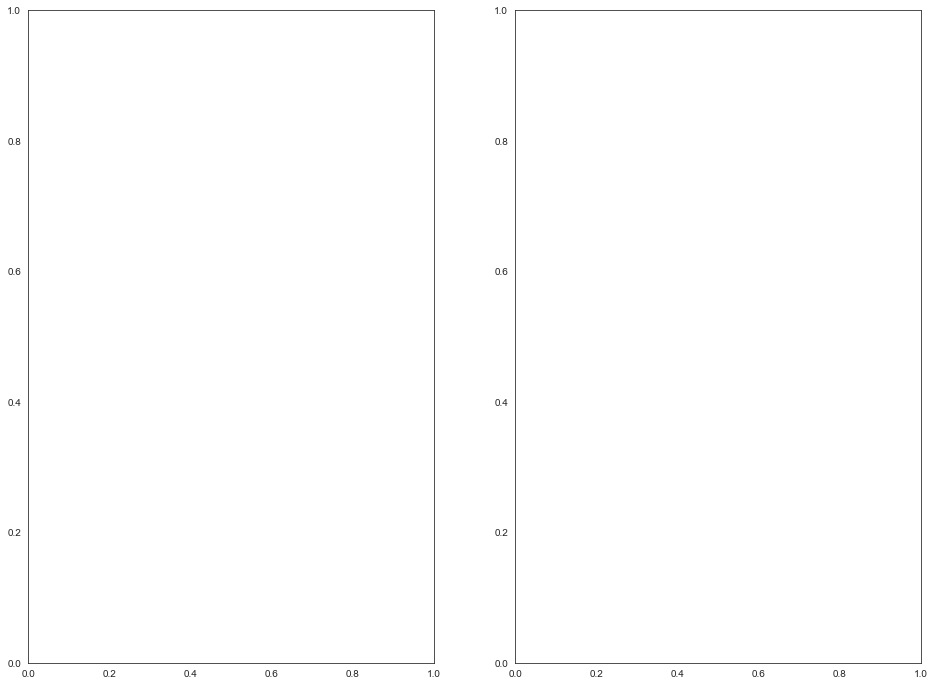

In [76]:
# Plotting embarked feature - create the plot sizes
fig, ax = plt.subplots(figsize=(16,12), ncols=2)

Text(0.5, 1.0, 'Test Set')

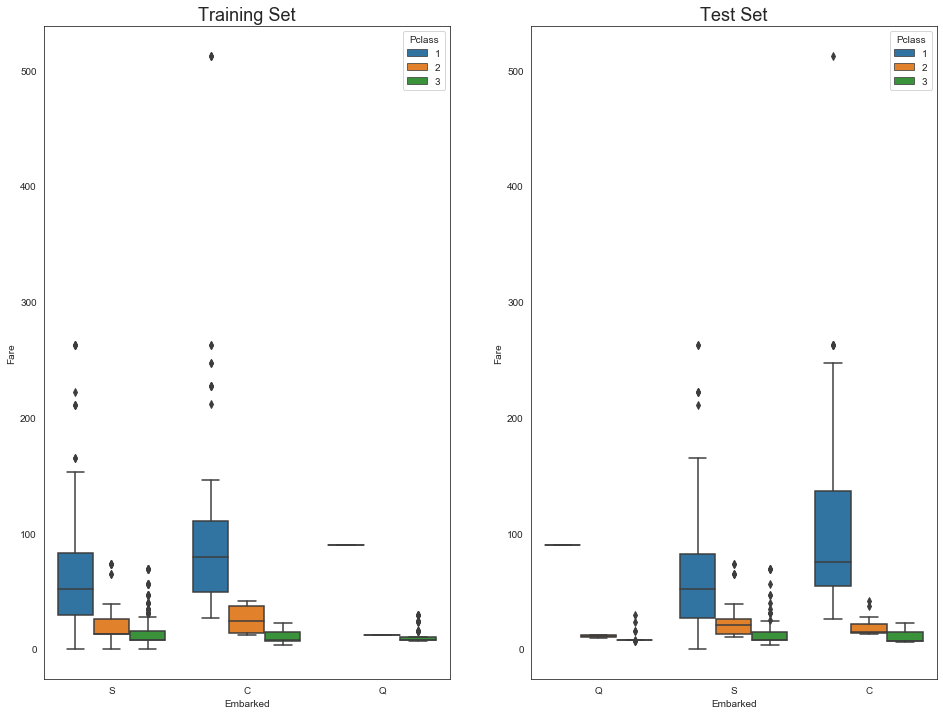

In [77]:
import seaborn as sns
import matplotlib
# matplotlib.use('TkAgg')
matplotlib.use('PS')
from matplotlib import pyplot as plt

# Plotting figure sizes
fig, ax = plt.subplots(figsize=(16,12), ncols=2)

# Use boxplot function from seaborn
ax1 = sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=ntrain, ax=ax[0])
ax2 = sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=ntest, ax=ax[1])

# Set titles
ax1.set_title('Training Set', fontsize=18)
ax2.set_title('Test Set', fontsize=18)

# Show figures
# fig.show() - warning so this useless until i get matplotlib to use TkAgg

##### Looks like the person also set the nulls to C after plotting it

- Their reason was that the average fare closest to $80 are in the C values.
- My method was to search for some insight where each locations were located and if there was a wealth gap between the cities then create proportion tables to see which values also had the highest survival rate since
    - Looking at the features
        1. Both these people were in the same room
        2. Has pretty above average fare prices
        3. Females
        4. Survived

### Cabin feature

In [78]:
# Get null values
ntrain.Cabin.isnull().sum()

687

In [79]:
print('Train Cabin Missing Values Proportion: ' + str(ntrain.Cabin.isnull().sum()/len(ntrain.Cabin)*100))

Train Cabin Missing Values Proportion: 77.10437710437711


In [80]:
# Print test cabin missing value proportion
print('Test Cabin Missing Value Proportion: ' + str(ntest.Cabin.isnull().sum()/len(ntest.Cabin)*100))

Test Cabin Missing Value Proportion: 78.22966507177034


It looks like there is a high amount of missing values in the Cabin feature for both the data sets.
- We can either not use this feature at all
- Discover methods to utilize feature engineering to make it usable
- Ask questions like:
    - Why are there so many missing Cabin values?
    - Survival rate of people with Cabins?
    - Socioeconomic status of Cabins?
    - Cabins closest to lifeboats?

In [81]:
# Add in a survived feature for the test dataset
ntest.Survived = np.nan

In [82]:
# Combine the datasets and input null value for test survived
all_data = pd.concat([ntrain, ntest], ignore_index=False)

In [83]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [84]:
# Assign the Cabin null values to N using fillna()
all_data.Cabin.fillna('N', inplace=True)

All the cabin names start with a letter followed by digits. It looks like there are some passengers that have booked multiple cabin rooms in their name. This could be because that they travelled together with family. Even if the letter was different, there seems to be significance with the letters instead of the numbers.

In [85]:
# Get individual indexed values per row
all_data.Cabin = [i[0] for i in all_data.Cabin]
all_data.Cabin[0:5]

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [86]:
# Summarize the groups with their fares using groupby() function
with_N = all_data[all_data.Cabin=='N']
without_N = all_data[all_data.Cabin!='N']

# Group by cabin, get Fare column and get the mean value
all_data.groupby('Cabin')['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [87]:
all_data.groupby('Cabin')['Fare'].median().sort_values()

Cabin
N    10.5000
F    13.0000
G    16.7000
A    35.0771
T    35.5000
D    52.5542
E    53.1000
B    82.2667
C    86.2896
Name: Fare, dtype: float64

In [88]:
# Create a function to give cabin names based on values
def cabin_estimate(x):
    letter = 0
    if x<16:
        letter='G'
    elif x>=16 and x<27:
        letter='F'
    elif x>=27 and x<38:
        letter='T'
    elif x>=38 and x<47:
        letter='A'
    elif x>=47 and x<53:
        letter='E'
    elif x>=53 and x<54:
        letter='D'
    elif x>=54 and x<116:
        letter='C'
    else:
        letter='B'
    return letter

In [89]:
# Apply cabin function in each unknown cabins (N values)
with_N['Cabin'].head()
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimate(x))

In [90]:
# Getting back train
all_data = pd.concat([with_N, without_N], axis=0)

In [91]:
print(with_N.shape)
print(without_N.shape)

(1014, 12)
(295, 12)


In [92]:
# Sort by ID to begin separating
all_data.sort_values(by='PassengerId', inplace=True)

# Separate the two datasets
train = all_data[:891]
test = all_data[891:]

In [93]:
train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,G,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,G,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,G,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


#### Fare feature

There was one null value in fare feature in the test dataset.

In [94]:
test[test.isnull().Fare]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,B,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [95]:
test[test.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,B,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


We can do a dirty method and just add in an average failure for the passenger type based on cabin, age, sex, etc.

In [96]:
# Get attributes and index the values to get the mean
missing_fare = round(test[(test.Pclass==3) & (test.Embarked=='S') & (test.Sex=='male')].Fare.mean(),2)
print('Avg Fare for Pclass = 3, Embarked = S, Sex = M: ' + str(missing_fare))

# Replace null fare
test.Fare.fillna(missing_fare, inplace=True)

Avg Fare for Pclass = 3, Embarked = S, Sex = M: 12.72


In [97]:
# Check for nulls again
print(test.isnull().sum().sort_values(ascending=False))
print('*'*30)
print(train.isnull().sum().sort_values(ascending=False))

Survived       418
Age             86
Ticket           0
SibSp            0
Sex              0
Pclass           0
PassengerId      0
Parch            0
Name             0
Fare             0
Embarked         0
Cabin            0
dtype: int64
******************************
Age            177
Ticket           0
Survived         0
SibSp            0
Sex              0
Pclass           0
PassengerId      0
Parch            0
Name             0
Fare             0
Embarked         0
Cabin            0
dtype: int64


#### Age feature

In [98]:
# Print out the missing values
print('Missing values in the age feature for the train set: ' + str(round(train.Age.isnull().sum()/len(train)*100,1)) + str('%'))

print('Missing values in the age feature for the train set: ' + str(round(test.Age.isnull().sum()/len(test)*100,1)) + str('%'))

Missing values in the age feature for the train set: 19.9%
Missing values in the age feature for the train set: 20.6%


Replacing it with a summary statistics may not be useful because age could determine the survival rate. Kids and older people have higher chance of survival. We could attempt to use an algorithm to see if we can model something for this feature instead.

### Age plot

Text(0.5, 1.0, 'Training Set: Cabin vs. Age for Survival Rate')

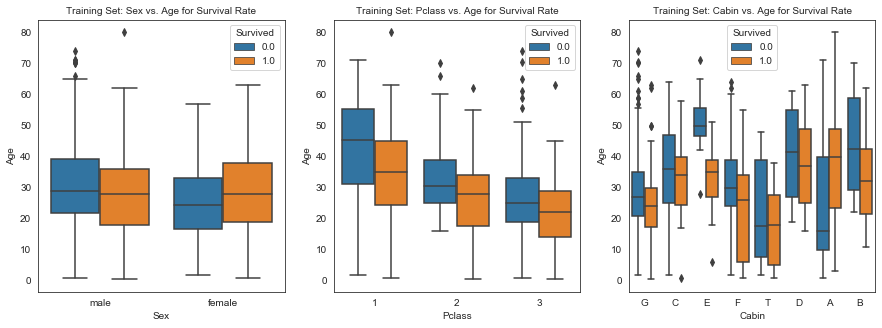

In [99]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Plot empty figure sizes using plt.subplots()
fig, ax = plt.subplots(figsize=(15,5), ncols=3, nrows=1)

# Create boxplots from the seaborn library: sns.boxplot()
ax1 = sns.boxplot(x='Sex', y='Age', hue='Survived', data=train, ax=ax[0])
ax2 = sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train, ax=ax[1])
ax3 = sns.boxplot(x='Cabin', y='Age', hue='Survived', data=train, ax=ax[2])

# # Set titles
ax1.set_title('Training Set: Sex vs. Age for Survival Rate', fontsize=10)
ax2.set_title('Training Set: Pclass vs. Age for Survival Rate', fontsize=10)
ax3.set_title('Training Set: Cabin vs. Age for Survival Rate', fontsize=10)

Based on these three plots and some inferences made from my previous work on this dataset...

These following groups have a higher survival rate than normal:
- Female
- Kids
- Older Adults
- Higher socioeconomic status people (high fares, good cabins, pclass, etc.)
- More to come such as titles, family size, child groups

### Gender and survived bar plots

Text(0.5, 0, 'Sex')

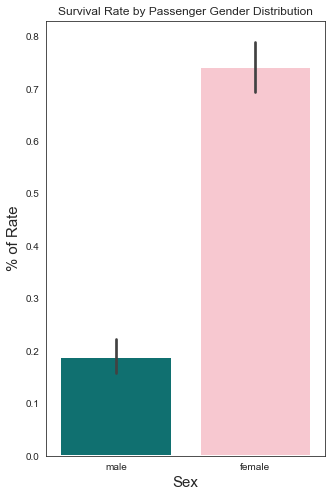

In [100]:
# Dictionary of clolors by value
colors = {'male': 'teal', 'female': 'pink'}

# Use plot.subplots() to generate empty space then barplots using sns.barplot()
plt.subplots(figsize=(5,8))

# Barplots
ax = sns.barplot(x='Sex', y='Survived', data=train, palette=colors, linewidth=2)
                #estimator=(lambda x: len(x)/len(train)*100))

# Title
plt.title('Survival Rate by Passenger Gender Distribution')
plt.ylabel('% of Rate', fontsize=15)
plt.xlabel('Sex', fontsize=15)

#### The survival rates of females are disproportional to males as expected

In [101]:
# Check survival rate in a crosstab
sex_survived = pd.crosstab(index=train['Survived'], columns=train['Sex'], margins=True)
sex_survived.index = ['Did not Survive', 'Survived', 'ColTotal']
round(sex_survived/sex_survived.loc['ColTotal']*100,1)

Sex,female,male,All
Did not Survive,25.8,81.1,61.6
Survived,74.2,18.9,38.4
ColTotal,100.0,100.0,100.0


### Passenger gender distribution survival count

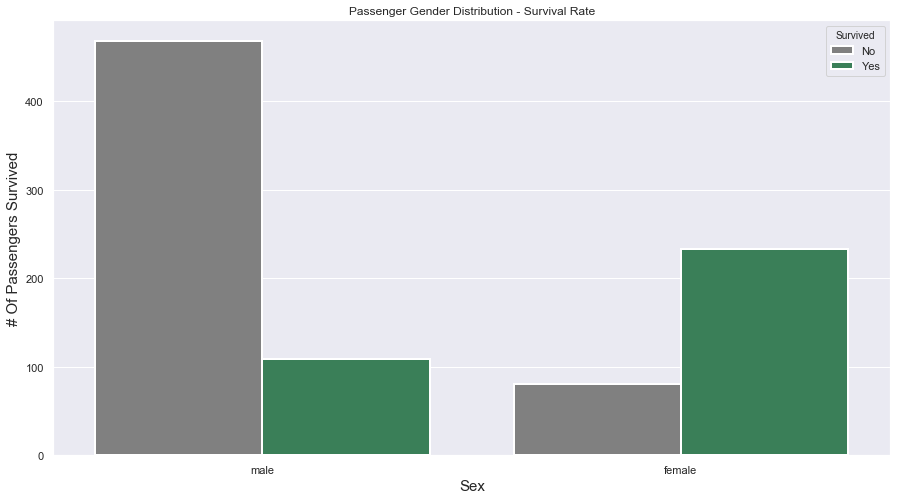

In [102]:
# Create color for palette
colors = {1: 'seagreen', 0: 'gray'}

# Set plot style using sns.set()
sns.set(style='darkgrid')

# Begin with creating empty figure size with plt.subplots()
plt.subplots(figsize=(15,8))

# Create the plot using sns.countplot()
ax = sns.countplot(x='Sex',
                   hue='Survived',
                   data=train,
                   linewidth=2,
                   palette=colors
                   )

# Set titles and labels
plt.title('Passenger Gender Distribution - Survival Rate')
plt.xlabel('Sex', fontsize=15)
plt.ylabel('# Of Passengers Survived', fontsize=15)

# Add legend
lgd = ax.get_legend()

# Set legend title
lgd.set_title('Survived')

# Set legend value names
lgds = lgd.texts
lgds[0].set_text('No')
lgds[1].set_text('Yes')

# Show plot
# plt.show()

As you can see from the plot above, females have a higher survival rate vs non-survival rate. If you're a female, your chances are going to be a lot higher than the males. Hopefully the model will catch this when we start using the features and plot variable importances.

### Pclass

Create barplots on the class distribution and survival %
- What can be inferred from the chart?

([<matplotlib.axis.XTick at 0x1f653e24208>,
 <a list of 3 Text xticklabel objects>)

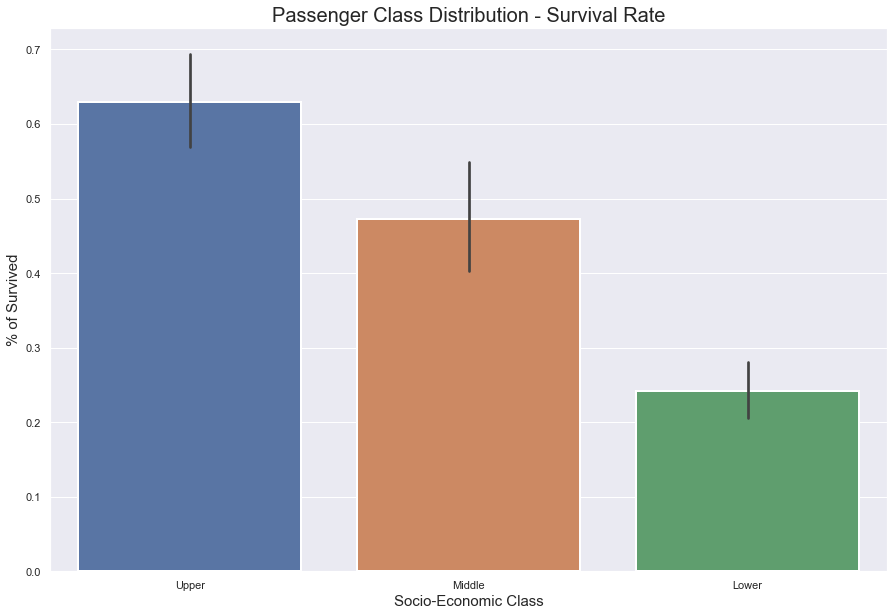

In [103]:
# Use plt.subplots() function to create figure space
plt.subplots(figsize = (15,10))

# Create barplot with sns.barplot()
sns.barplot(x='Pclass',
            y='Survived',
            data=train,
            linewidth=2)

# Set title and labels
plt.title('Passenger Class Distribution - Survival Rate', fontsize=20)
plt.xlabel('Socio-Economic Class', fontsize=15)
plt.ylabel('% of Survived', fontsize=15)
labels = ['Upper', 'Middle', 'Lower']

# Move the label to align it
val = [0,1,2]
plt.xticks(val, labels)

Sooo higher socio-economic status = higher survival rate

### Kernel density plot with the same data - sns.kdeplot()

([<matplotlib.axis.XTick at 0x1f653e2cdd8>,
 <a list of 3 Text xticklabel objects>)

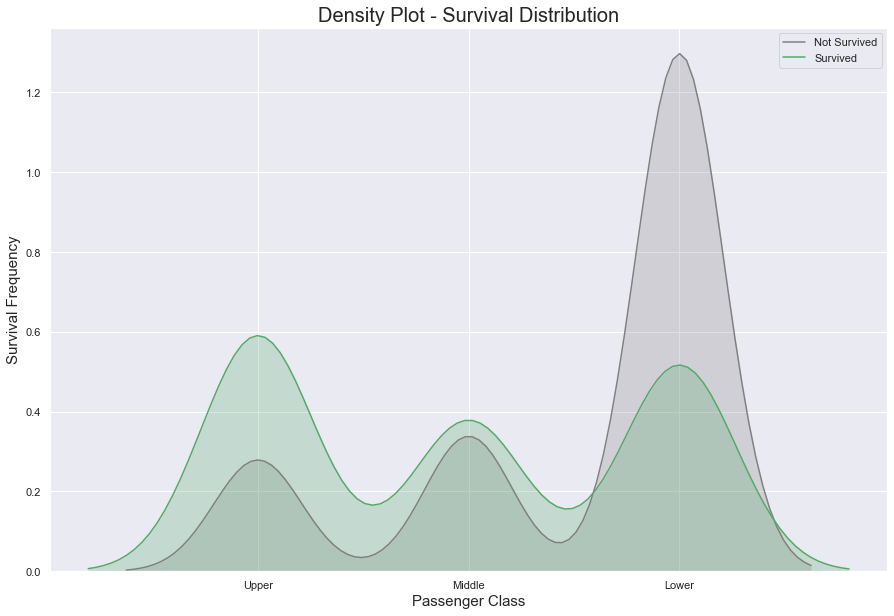

In [104]:
# Kernel density plot - create figure space using plt.figure() and not plt.subplots()
fig = plt.figure(figsize=(15,10))

# Create the plot using sns.kdeplot()
ax1 = sns.kdeplot(train.Pclass[train.Survived==0],   # data subset
                  color='gray',                      # color
                  shade=True,                        # shade
                  label='Not Survived'               # label
                 )

ax1 = sns.kdeplot(train.Pclass[train.Survived==1],
                  color='g',
                  shade=True,
                  label='Survived'
                 )

# Set title and labels
plt.title('Density Plot - Survival Distribution', fontsize=20) # title
plt.xlabel('Passenger Class', fontsize=15)                     # x
plt.ylabel('Survival Frequency', fontsize=15)                  # y

# Set x-ticks and labels
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels)

Take a look at this and check out the difference between the top of the gray density shading vs the green shading. The difference is much higher in the Lower class vs. the Upper where it is actually negative or positive depending on how you see the graph.

### Fare and survival density plot

Text(0.5, 0, 'Fare')

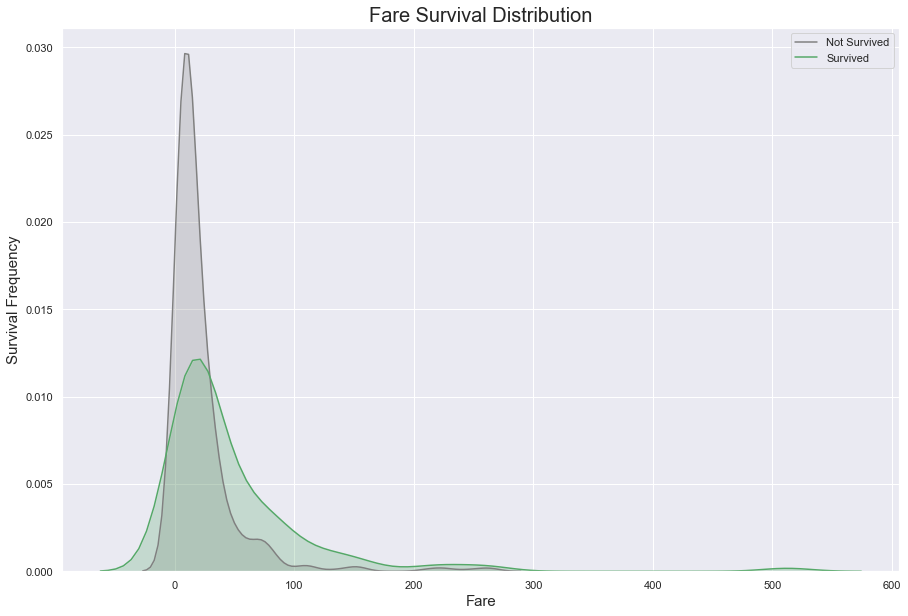

In [105]:
# Create figure space
fig = plt.figure(figsize=(15,10))

# Create a kernel density plot with two shaded regions
ax = sns.kdeplot(train.loc[(train.Survived==0), 'Fare'],
                 color='gray',
                 shade=True,
                 label='Not Survived')

ax = sns.kdeplot(train.loc[(train.Survived==1), 'Fare'],
                color='g',
                shade='True',
                label='Survived')

# Set title and labels
plt.title('Fare Survival Distribution', fontsize=20)
plt.ylabel('Survival Frequency', fontsize=15)
plt.xlabel('Fare', fontsize=15)

The plot also shows a similar spike like the lower class survival rate where the gray area is way above the shaded green region.

Looking proportionally, if you paid a good amount compared to the mean/median rate, you had a better chance of surviving.

7/9 people survived when the fare was 250.01 and above. After looking at these 9 people, the Fortune family may have held high socio-economic status as they were all in this fare range. The males died unfortunately, either saving their sisters or was just in the wrong area at the wrong time. 

In [106]:
# Outliers
train[train.Fare>250]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
27,19.0,C,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0.0,19950
88,23.0,C,S,263.0000,"Fortune, Miss. Mabel Helen",2,89,1,female,3,1.0,19950
258,35.0,B,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1.0,PC 17755
311,18.0,B,C,262.3750,"Ryerson, Miss. Emily Borie",2,312,1,female,2,1.0,PC 17608
341,24.0,C,S,263.0000,"Fortune, Miss. Alice Elizabeth",2,342,1,female,3,1.0,19950
438,64.0,C,S,263.0000,"Fortune, Mr. Mark",4,439,1,male,1,0.0,19950
679,36.0,B,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0,PC 17755
737,35.0,B,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1.0,PC 17755
742,21.0,B,C,262.3750,"Ryerson, Miss. Susan Parker ""Suzette""",2,743,1,female,2,1.0,PC 17608


### Plotting without fares above 280

Text(0.5, 0, 'Fare')

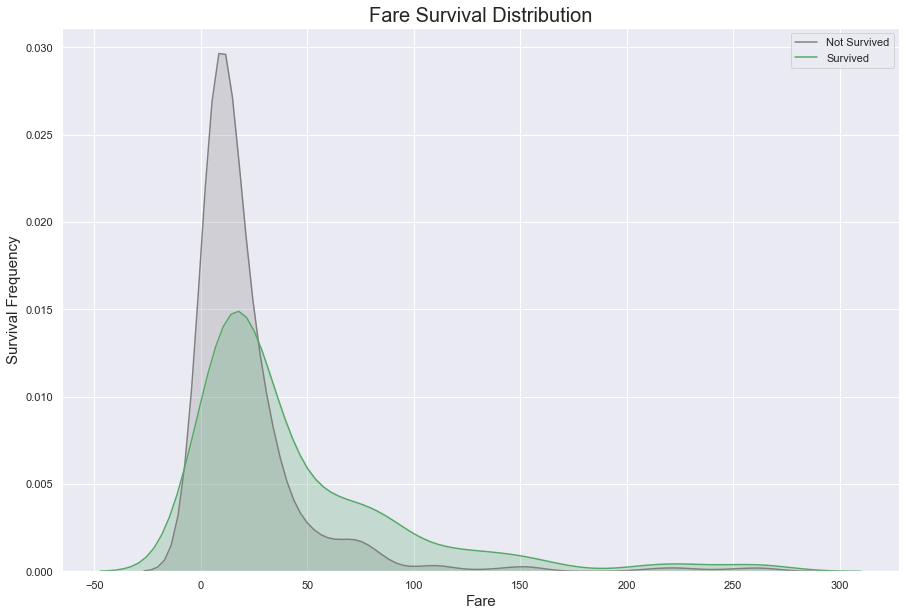

In [107]:
# Create figure space
fig = plt.figure(figsize=(15,10))

# Create a kernel density plot with two shaded regions
ax = sns.kdeplot(train.loc[(train.Survived==0 & (train.Fare<280)), 'Fare'],
                 color='gray',
                 shade=True,
                 label='Not Survived')

ax = sns.kdeplot(train.loc[(train.Survived==1) & (train.Fare<280), 'Fare'],
                color='g',
                shade='True',
                label='Survived')

# Set title and labels
plt.title('Fare Survival Distribution', fontsize=20)
plt.ylabel('Survival Frequency', fontsize=15)
plt.xlabel('Fare', fontsize=15)

Text(0.5, 0, 'Fare')

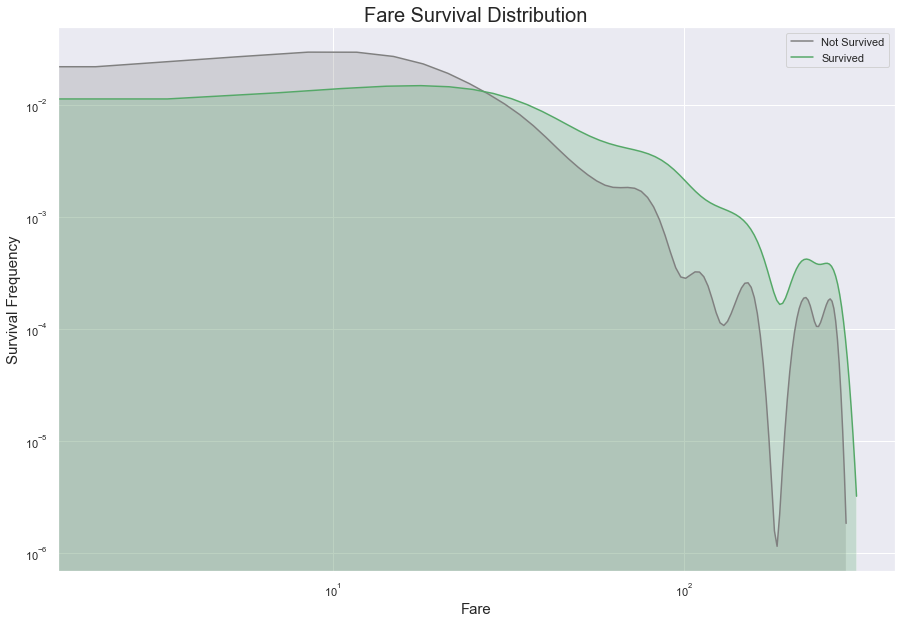

In [108]:
# Set a log axis
# Create figure space
fig = plt.figure(figsize=(15,10))

# Create a kernel density plot with two shaded regions
ax = sns.kdeplot(train.loc[(train.Survived==0 & (train.Fare<280)), 'Fare'],
                 color='gray',
                 shade=True,
                 label='Not Survived')

ax = sns.kdeplot(train.loc[(train.Survived==1) & (train.Fare<280), 'Fare'],
                color='g',
                shade='True',
                label='Survived')

# Set title and labels and axis
ax.set(xscale='log', yscale='log')
plt.title('Fare Survival Distribution', fontsize=20)
plt.ylabel('Survival Frequency', fontsize=15)
plt.xlabel('Fare', fontsize=15)

### Age and survival rate

We made some assumptions earlier on the age and the probability of survival rate. If you're a child or an elderly person, you have a higher chance of survival compared to the general population.

Text(0, 0.5, 'Frequency')

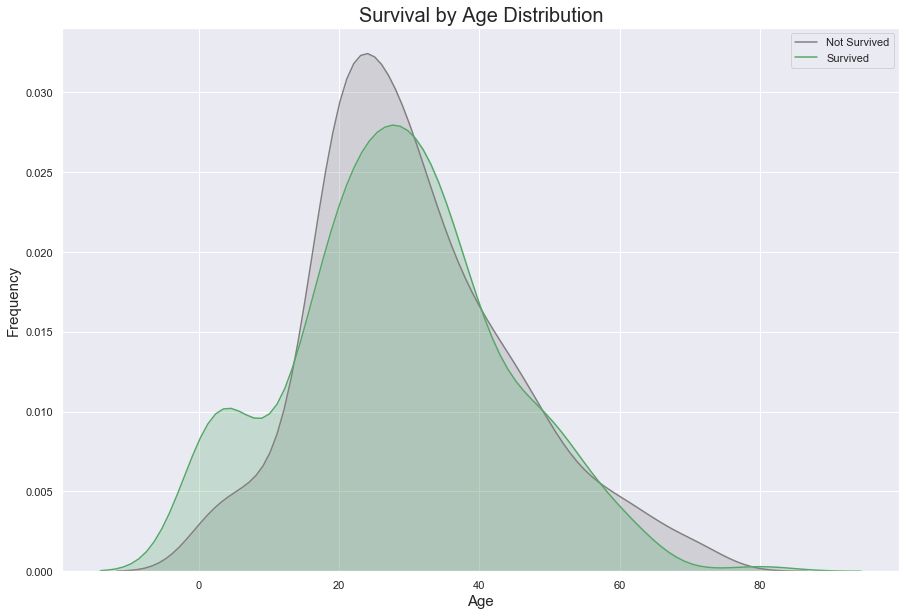

In [109]:
# Create figure spaces
fig = plt.figure(figsize=(15,10))

# Create a kernel density plot (Age>0 for nulls)
ax = sns.kdeplot(train.loc[(train.Survived==0) & (train.Age>0), 'Age'],
                color='gray',
                shade=True,
                label='Not Survived')

ax = sns.kdeplot(train.loc[(train.Survived==1) & (train.Age>0), 'Age'],
                color='g',
                shade=True,
                label='Survived')

# Set title and labels
plt.title('Survival by Age Distribution', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

In [110]:
train.Age.isnull().sum()

177

It looks like almost no age group besides children and infants survived more than death. We can assume that this group was a priority to get to safety and can also fit more into a lifeboat due to their size. 

### Faceted histogram plots by Sex and Age

The idea of faceted plots is to visualize multiple variables and relationships at the same time. 

Create faceted barplots with the sex and age Features. In R, this could be done by using ggplot() and facet_grid(~Var) or in python with sns.FacetGrid() 

c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:375: UserWarning: tight_layout : falling back to Agg renderer
  fig.tight_layout()


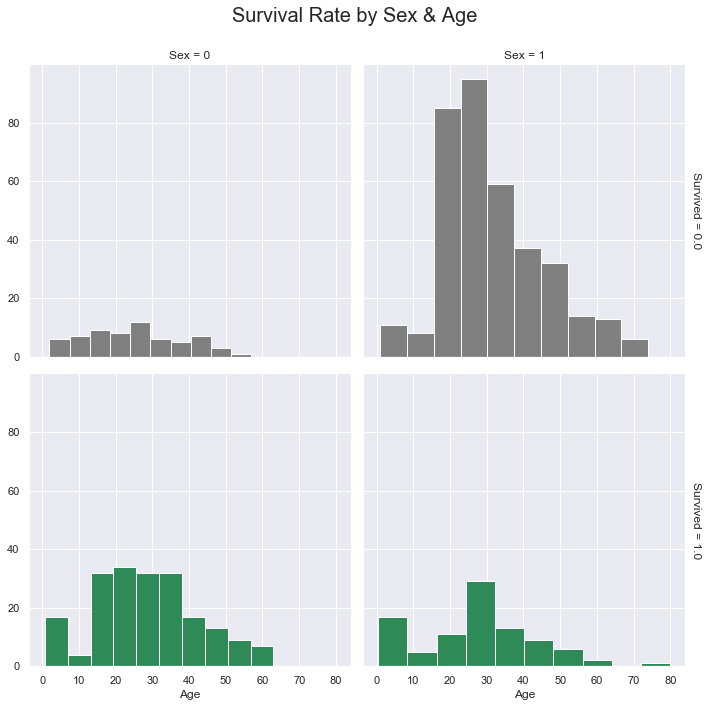

In [157]:
# Colors
colors = {1:'seagreen', 0:'gray'}

# Seaborn's FacetGrid() grid
ax = sns.FacetGrid(train, col='Sex', row='Survived',
                  height=5,
                  margin_titles=True,
                  hue='Survived',
                  palette=colors)

# Create the histograms from ax variable
ax = ax.map(plt.hist, 'Age', edgecolor='white')

# Set title
ax.fig.suptitle('Survival Rate by Sex & Age', size=20)
plt.subplots_adjust(top=0.90) # move the plot down to fit title

### Facetgrid: Histograms for Sex and Embarked

c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:375: UserWarning: tight_layout : falling back to Agg renderer
  fig.tight_layout()


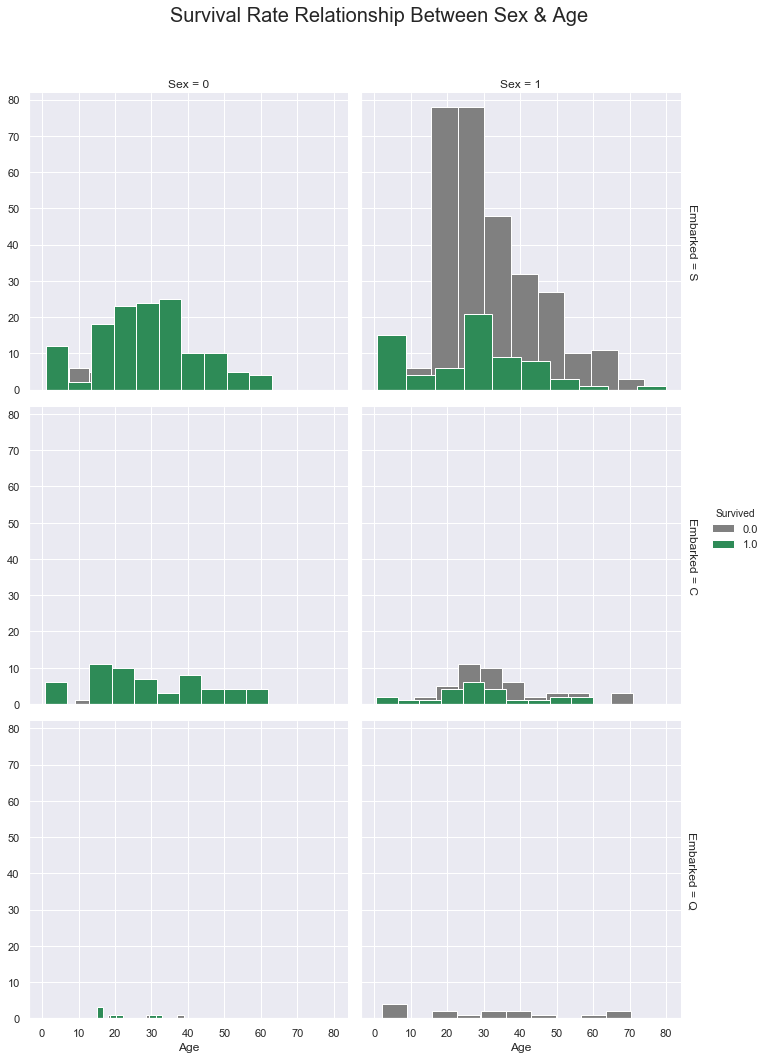

In [156]:
# Create facetgrid area
ax = sns.FacetGrid(train, col='Sex', row='Embarked',
                  height=5,
                  margin_titles=True,
                  hue='Survived',
                  palette=colors)

# Create histograms
ax = ax.map(plt.hist, 'Age', edgecolor='white')

# Add legend
ax.add_legend()

# Set and adjust titles
ax.fig.suptitle('Survival Rate Relationship Between Sex & Age', size=20)
plt.subplots_adjust(top=0.90)

Another illustration between embarked locations with gender facets. Like we saw previously, females have a higher survival rate and it definitely shows here per location.

With that being said, what else can we see from these charts?
- We can also see that the location 'S' which is Southampton has majority of the passengers with the least being Queenstown (Q). 
- Unless we zoom into the chart for Queenstown, it looks like there were no male survivors.
- Cherbourg (C) has a high survival rate distribution according to the plot. 

### Scatterplots by Sex, Fare & Age

Now that we have seen FacetGrid() and the use of histograms (plt.hist()), we can try another type of plot: scatterplots by using plt.scatter()

c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:375: UserWarning: tight_layout : falling back to Agg renderer
  fig.tight_layout()


<Figure size 1080x720 with 0 Axes>

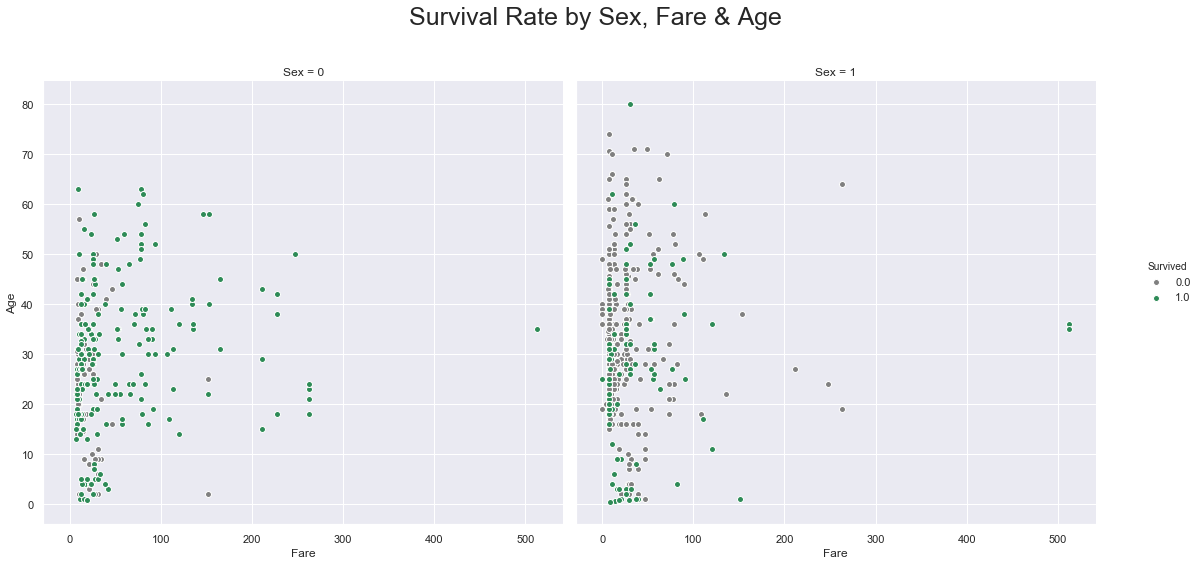

In [160]:
# Create figure
fig = plt.figure(figsize=(15,10))
fig.set_tight_layout(False)

# Create facetgrid()
ax = sns.FacetGrid(train, col='Sex',
                  hue='Survived',
                  margin_titles=True,
                  palette=colors,
                  height=8)

# Create scatterplot
ax.map(plt.scatter, 'Fare', 'Age', edgecolor='w')

# Add legend
ax.add_legend()

# Set and adjust titles if needed
ax.fig.suptitle('Survival Rate by Sex, Fare & Age', size=25)
plt.subplots_adjust(top=0.85)

Outliers could be seen with the points that are above 500. We can either plot without them to see the distribution better.

##### Steps
1. Create figure space
2. Create facetGrid()
3. Create plot by ax.map() or snsplot()
4. Set titles, legends, etc.
5. Show plot

### Creating a factor plot for Parch  (factorplot() renamed to catplot()?)

c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:375: UserWarning: tight_layout : falling back to Agg renderer
  fig.tight_layout()


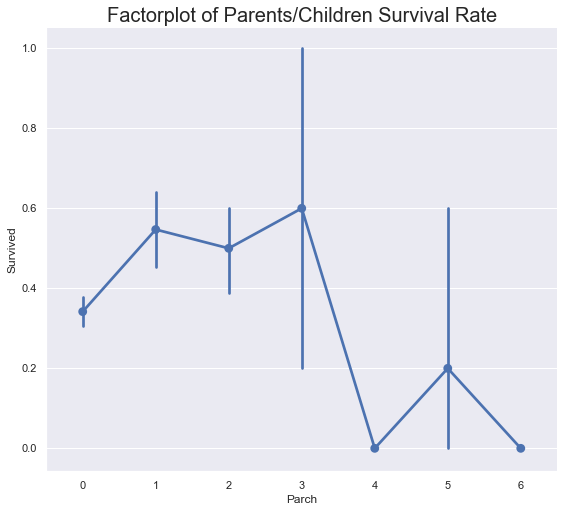

In [155]:
# Remove fare outliers in the plot
sns.catplot(x='Parch', y='Survived',
              data=train[train.Fare<500],
              kind='point',
              height=8) # size is renamed to height

# Set titles and adjustments
plt.title('Factorplot of Parents/Children Survival Rate', fontsize=20)
plt.subplots_adjust(top=0.85)

Passengers who traveled in larger groups had less survival rate than other passengers. 

### Factor Plot for SibSp (factorplot() renamed to catplot()?)

c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:375: UserWarning: tight_layout : falling back to Agg renderer
  fig.tight_layout()


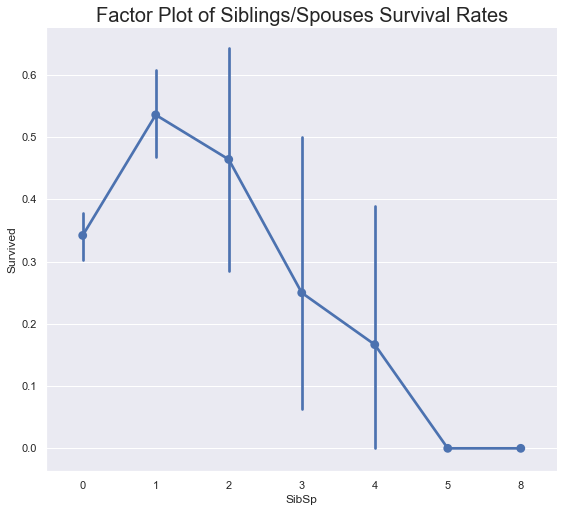

In [153]:
sns.catplot(x='SibSp', y='Survived',
              data=train[train.Fare<500],
              kind='point',
              height=8)

# Set titles and adjustments
plt.title('Factor Plot of Siblings/Spouses Survival Rates', fontsize=20)
plt.subplots_adjust(top=0.85)

Passengers who traveled in small groups with siblings/spouses had higher survival rates than other passengers as shown in the plot above. There is a decline as the numbers get higher after 1 sibling/spouse.

What can be inferred from this?
- Movement to safety is a lot easier when there are less people
- Larger groups tend to try to do initial search for their family members/loved ones longer than smaller groups
- The longer you wait the higher chance of death (waiting = search, waiting)

### Update gender variables to be numerical

In [116]:
# Test first
traincopy = train.copy()

# Get values 
traincopy[traincopy.Sex=='female'].Sex.value_counts()

# Substitute
traincopy[traincopy.Sex=='female'].Sex = 0

# Show top 5
traincopy.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,G,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,G,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,G,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


### Sample looping to change value

In [117]:
for col in traincopy.columns:
    print(col)

Age
Cabin
Embarked
Fare
Name
Parch
PassengerId
Pclass
Sex
SibSp
Survived
Ticket


In [118]:
traincopy.Sex.apply(lambda x: 0 if x=='female' else 1).head(10)

0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    0
9    0
Name: Sex, dtype: int64

In [119]:
traincopy.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [120]:
# Assign the values for train and test sets
train.Sex = train.Sex.apply(lambda x:0 if x=='female' else 1)
test.Sex = test.Sex.apply(lambda x:0 if x=='female' else 1)

print('*'*40)
print(train.head())
print('*'*40)
print(test.head())

****************************************
    Age Cabin Embarked     Fare  \
0  22.0     G        S   7.2500   
1  38.0     C        C  71.2833   
2  26.0     G        S   7.9250   
3  35.0     C        S  53.1000   
4  35.0     G        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket  
0       3    1      1       0.0         A/5 21171  
1       1    0      1       1.0          PC 17599  
2       3    0      0       1.0  STON/O2. 3101282  
3       1    0      1       1.0            113803  
4       3    1      0       0.0

### Statistical Analysis

In [121]:
train.describe()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.647587,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,0.477990,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,1.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,1.000000,8.000000,1.000000


### Describe only objects using include='O'

In [122]:
# Describe objects (strings) columns
train.describe(include='O')

,Cabin,Embarked,Name,Ticket
count,891,891,891,891
unique,8,3,891,681
top,G,S,"Leader, Dr. Alice (Farnham)",347082
freq,464,644,1,7


### Describe only numerical columns using include=np.number

In [123]:
# Describe only numerical columns
train.describe(include=np.number)

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.647587,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,0.477990,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,1.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,1.000000,8.000000,1.000000


In [124]:
train.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,714.000000,891,891,891.000000,891,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891
unique,NaN,8,3,NaN,891,NaN,NaN,NaN,NaN,NaN,NaN,681
top,NaN,G,S,NaN,"Leader, Dr. Alice (Farnham)",NaN,NaN,NaN,NaN,NaN,NaN,347082
freq,NaN,464,644,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,7
mean,29.699118,NaN,NaN,32.204208,NaN,0.381594,446.000000,2.308642,0.647587,0.523008,0.383838,NaN
std,14.526497,NaN,NaN,49.693429,NaN,0.806057,257.353842,0.836071,0.477990,1.102743,0.486592,NaN
min,0.420000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN
25%,20.125000,NaN,NaN,7.910400,NaN,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,446.000000,3.000000,1.000000,0.000000,0.000000,NaN
75%,38.000000,NaN,NaN,31.000000,NaN,0.000000,668.500000,3.000000,1.000000,1.000000,1.000000,NaN


In [125]:
train.describe(include=['O', 'category'])

,Cabin,Embarked,Name,Ticket
count,891,891,891,891
unique,8,3,891,681
top,G,S,"Leader, Dr. Alice (Farnham)",347082
freq,464,644,1,7


### Another way to get survival rate by groupby().mean()

Read about .reset_index() and the uses of it

In [126]:
train[['Pclass', 'Survived']].groupby('Pclass').mean() # optional .reset_index()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [127]:
#round(train.Pclass.value_counts().sum()/len(train)*100,1)
train.Pclass.value_counts().sum()

891

In [128]:
train[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Above method works well for null values since i'm counting it

### Survival rates across features

In [129]:
# Overview
survived_summary = train.groupby('Survived')
survived_summary.mean()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp
Survived,,,,,,,
0.0,30.626179,22.117887,0.329690,447.016393,2.531876,0.852459,0.553734
1.0,28.343690,48.395408,0.464912,444.368421,1.950292,0.318713,0.473684


In [130]:
# Overview - Survived
survived_summary = train.groupby('Survived')
survived_summary.mean().reset_index()

,Survived,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp
0,0.0,30.626179,22.117887,0.329690,447.016393,2.531876,0.852459,0.553734
1,1.0,28.343690,48.395408,0.464912,444.368421,1.950292,0.318713,0.473684


In [131]:
survived_summary = train.groupby('Sex')
survived_summary.mean().reset_index()

,Sex,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
0,0,27.915709,44.479818,0.649682,431.028662,2.159236,0.694268,0.742038
1,1,30.726645,25.523893,0.235702,454.147314,2.389948,0.429809,0.188908


In [132]:
survived_summary = train.groupby('Sex')
survived_summary

In [133]:
survived_summary.mean().reset_index()

,Sex,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
0,0,27.915709,44.479818,0.649682,431.028662,2.159236,0.694268,0.742038
1,1,30.726645,25.523893,0.235702,454.147314,2.389948,0.429809,0.188908


In [134]:
survived_summary = train.groupby('Pclass')
survived_summary.mean().reset_index()

,Pclass,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived
0,1,38.233441,84.154687,0.356481,461.597222,0.564815,0.416667,0.629630
1,2,29.877630,20.662183,0.380435,445.956522,0.586957,0.402174,0.472826
2,3,25.140620,13.675550,0.393075,439.154786,0.706721,0.615071,0.242363


### Correlation Matrix/Plot

In [135]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending=False))

,Survived
Survived,1.000000
Sex,0.543351
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


Like the plots and data show, Sex is the best feature with a correlation to the survived column. The second is Pclass, which makes sense where location and status can be a large factor.

In [136]:
# Top features
corr = train.corr()**2
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Sex            0.295231
Pclass         0.114569
Fare           0.066207
Parch          0.006663
Age            0.005963
SibSp          0.001248
PassengerId    0.000025
Name: Survived, dtype: float64

### Create a correlation matrix (heatmap) of numerical variables

In [137]:
# Create an array
np.zeros_like(train.corr(), dtype=np.bool)

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]])

Text(0.5, 1.05, 'Feature Correlation')

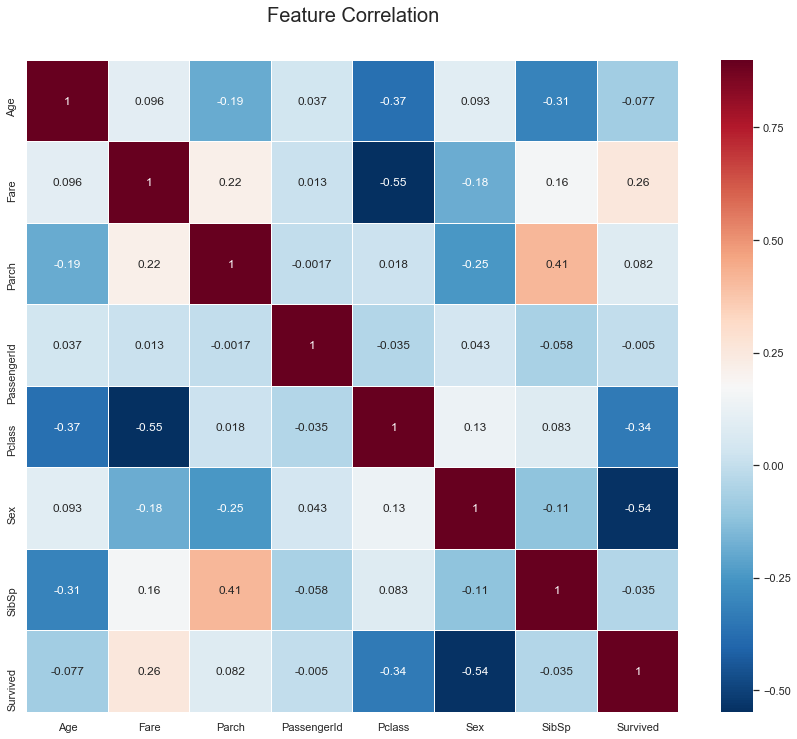

In [138]:
# Plot using plt.subplots
plt.subplots(figsize=(15,12))

# Create matrix using sns.heatmap()
sns.heatmap(train.corr(),
            annot=True,
            cmap='RdBu_r',
            linewidths=0.1,
            linecolor='white',
            vmax=0.9,
            square=True
           )

# Set title and make adjustments
plt.title('Feature Correlation', y=1.05, fontsize=20)

### Statistical Test for Correlation

#### Hypothesis Testing

A statistical test which compares the mean of two groups and tries to find out whether the two sample means are different form each other and if they are different, how significantly that difference is. 

In other words, all hypothesis testing is asking is: does our evidence make the null hypothesis (what the world may look like) look ridiculous. If so, we choose the alternative hypothesis (all other situations). 

Rejecting the null hypothesis means that we learned something and we should change our minds. Not rejecting the null means that we learned nothing intersting that may change our minds which is determined by the p-value (probability of getting at least something as bad as the world we are trying to prove (alternative)). 

#### Steps to take in a hypothesis test:
1. Formulate a well-developed research problem or question (like any other problems we attempt to answer)
2. What is the null hypothesis and what is the alternative hypothesis? What's our sample size? What is a big enough sample size needed to make sure the test we are performing will be significant? This could be determined by power, which asks us did we do our homework (Cassie K.)? Power analysis is a way to check how much power you need.
3. Determine the test statistic. Usually this is determined by the type of test we are performing and if it's one-tailed or two-tailed.
4. Specify the significance level (risk tolerated). Alpha is the probability of rejecting the null when it is true, in other words, we are confidence with rejecting the null at this level. 
5. Compute test statistic.
6. Compute the p-value. The smaller the value, the stronger the evidence that there is something interesting going on and we should take a look.
7. Communicate the result. Are we rejecting the null or failing to accept the null? Is there going to be a change?

#### Titanic: Hypothesis Test

1. Is there a significant difference in the mean sex between passengers who survived and who didn't survive?
2. Hypothesis
    - Ho = No difference in the survival rate between the male and female passengers
    - Ha = There is a difference in the survival rate between the male and female passengers
3. Two-tailed test since the difference between male and female passenger in the survival rate could be higher or lower than 4. Since we do not know the standard deviation and n is small, we will use the t-distribution.
5. Compute statistic
6. Compute p-value
7. Result

In [168]:
# Get gender means
male_mean = train[train.Sex==1].Survived.mean()
female_mean = train[train.Sex==0].Survived.mean()

# Result
print ("Male survival mean: " + str(male_mean))
print ("Female survival mean: " + str(female_mean))

print ("The mean difference between male and female survival rate: " + str(round(female_mean - male_mean,2)))

Male survival mean: 0.18890814558058924
Female survival mean: 0.7420382165605095
The mean difference between male and female survival rate: 0.55


Take 50 random samples of male and female from the train data

In [169]:
# Separate male and female dataframes
male = train[train.Sex==1]
female = train[train.Sex==0]

# Get 50 random samples for male and female using random.sample
import random
male_sample = random.sample(list(male.Survived), 50)
female_sample = random.sample(list(female.Survived), 50)

# Use sample means of survival features
male_sample_mean = np.mean(male_sample)
female_sample_mean = np.mean(female_sample)

# Results
print ("Male sample mean: " + str(male_sample_mean))
print ("Female sample mean: " + str(female_sample_mean))
print ("Difference between male and female sample mean: " + str(female_sample_mean - male_sample_mean))

Male sample mean: 0.18
Female sample mean: 0.72
Difference between male and female sample mean: 0.54


In [170]:
# Perform the test
import scipy.stats as stats
print(stats.ttest_ind(male_sample, female_sample))
print('This is the p-value when we use the standard form: ' + format(stats.ttest_ind(male_sample, female_sample).pvalue, '.32f'))

Ttest_indResult(statistic=-6.3966808403418005, pvalue=5.4421779548966955e-09)
This is the p-value when we use the standard form: 0.00000000544217795489669548945062


### Result

The p-value is so low, which indicates a large significance in the genders. The observation is therefore significant and we reject the null hypothesis. There is a significant differnces between males and females in survival rates.

### Feature Engineering

Feature engineering can make or break your model sometimes. With poor features as inputs, your model will not be good. This particular section can also bring out the more creative side in creating extra features that may be helpful. We could combine certain features together, grouped features, etc. 

But be careful of multicollinearity as we don't want that. Multicollinearity is when there is a strong relationship among independent variables. This could be bad for your model as it will bring it more bias if two variables are similar, we would only want to use the best one.

### name_length feature

Create a new feature name_length that will count the letters of each name. This is a new one. I've never tried this one before when I was working on this in R.

In [181]:
# Create a new column using a for loop which will separate each letter and count it
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name] 

# Define a new function called new_length_group()
''' Bins the new feature into groups'''
def name_length_group(size):
    a = ''
    if size<=20:
        a='short'
    elif size<=35:
        a='medium'
    elif size<=45:
        a='good'
    else:
        a='long'
    return a

# Use map(fun, iter) on the datasets which applys the given function to each item of a given iterable (list, tuple, etc)
train['lengthGroup'] = train['name_length'].map(name_length_group)
test['lengthGroup'] = test['name_length'].map(name_length_group)

In [182]:
print(type(train['name_length']))
print(type(train.name_length))

<class 'pandas.core.series.Series'>
<class 'list'>


In [183]:
train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,name_length,lengthGroup
0,22.0,G,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,23,medium
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,51,long
2,26.0,G,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,22,medium
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,44,good
4,35.0,G,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,24,medium


### Title

Get the title of each name

In [184]:
# Split the name by '.' and ','
train['title'] = [i.split('.')[0] for i in train.Name]

In [186]:
train[['Name', 'title']].head() # Check

,Name,title
0,"Braund, Mr. Owen Harris","Braund, Mr"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...","Cumings, Mrs"
2,"Heikkinen, Miss. Laina","Heikkinen, Miss"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)","Futrelle, Mrs"
4,"Allen, Mr. William Henry","Allen, Mr"


In [188]:
for i in train.title.head():
    print(i)

Braund, Mr
Cumings, Mrs
Heikkinen, Miss
Futrelle, Mrs
Allen, Mr


In [193]:
'Cumings, Mrs'.split(',')

['Cumings', ' Mrs']

In [209]:
# Split the name by '.' and ','
train["title"] = [i.split('.')[0] for i in train.Name]
train["title"] = [i.split(',')[1] for i in train.title] # Gets 2nd element
test["title"] = [i.split('.')[0] for i in test.Name]
test["title"] = [i.split(',')[1] for i in test.title] # Gets 2nd element

print(train[['Name', 'title']].head())
print('*'*50)
print(test[['Name', 'title']].head())

                                                Name  title
0                            Braund, Mr. Owen Harris     Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    Mrs
2                             Heikkinen, Miss. Laina   Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    Mrs
4                           Allen, Mr. William Henry     Mr
**************************************************
                                           Name title
0                              Kelly, Mr. James    Mr
1              Wilkes, Mrs. James (Ellen Needs)   Mrs
2                     Myles, Mr. Thomas Francis    Mr
3                              Wirz, Mr. Albert    Mr
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   Mrs


In [204]:
train['title'][0].split(',')

[' Mr']

In [205]:
train['title'][1].split(',')

[' Mrs']

In [202]:
print(train[['Name', 'title']].head())

                                                Name  title
0                            Braund, Mr. Owen Harris     Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    Mrs
2                             Heikkinen, Miss. Laina   Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    Mrs
4                           Allen, Mr. William Henry     Mr


In [206]:
train['title'][2].split(',')

[' Miss']

In [210]:
len(train['title'][2])

5

In [211]:
len(train['title'][2].strip())

4

In [214]:
# Strip the spaces using map and lambda
train['title'].map(lambda x: x.strip()).head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: title, dtype: object

In [220]:
# Verify the strip
len(train['title'].map(lambda x: x.strip()).head(1)[0])

2

In [221]:
# Strip both datasets
train['title'] = train['title'].map(lambda x: x.strip())
test['title'] = test['title'].map(lambda x: x.strip())

In [222]:
train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,name_length,lengthGroup,title
0,22.0,G,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,23,medium,Mr
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,51,long,Mrs
2,26.0,G,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,22,medium,Miss
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,44,good,Mrs
4,35.0,G,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,24,medium,Mr


In [227]:
# Replace known titles that can be grouped together
train['title'] = [i.replace('Ms', 'Miss') for i in train.title]
train['title'] = [i.replace('Mlle', 'Miss') for i in train.title]
train['title'] = [i.replace('Mme', 'Mrs') for i in train.title]
train['title'] = [i.replace('Dr', 'Rare') for i in train.title]
train['title'] = [i.replace('Col', 'Rare') for i in train.title]
train['title'] = [i.replace('Major', 'Rare') for i in train.title]
train['title'] = [i.replace('Don', 'Rare') for i in train.title]
train['title'] = [i.replace('Jonkheer', 'Rare') for i in train.title]
train['title'] = [i.replace('Sir', 'Rare') for i in train.title]
train['title'] = [i.replace('Lady', 'Rare') for i in train.title]
train['title'] = [i.replace('Capt', 'Rare') for i in train.title]
train['title'] = [i.replace('the Countess', 'Rare') for i in train.title]
train['title'] = [i.replace('Rev', 'Rare') for i in train.title]

# ['Rare' for i in train.Name]
test['title'] = [i.replace('Ms', 'Miss') for i in test.title]
test['title'] = [i.replace('Dr', 'Rare') for i in test.title]
test['title'] = [i.replace('Col', 'Rare') for i in test.title]
test['title'] = [i.replace('Dona', 'Rare') for i in test.title]
test['title'] = [i.replace('Rev', 'Rare') for i in test.title]

# Count
train.groupby('title').count()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,name_length,lengthGroup
title,,,,,,,,,,,,,,
Master,36,40,40,40,40,40,40,40,40,40,40,40,40,40
Miss,149,185,185,185,185,185,185,185,185,185,185,185,185,185
Mr,398,517,517,517,517,517,517,517,517,517,517,517,517,517
Mrs,109,126,126,126,126,126,126,126,126,126,126,126,126,126
Rare,22,23,23,23,23,23,23,23,23,23,23,23,23,23


In [228]:
# Count
test.groupby('title').count()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,name_length,lengthGroup
title,,,,,,,,,,,,,,
Master,17,21,21,21,21,21,21,21,21,21,0,21,21,21
Miss,64,79,79,79,79,79,79,79,79,79,0,79,79,79
Mr,183,240,240,240,240,240,240,240,240,240,0,240,240,240
Mrs,62,72,72,72,72,72,72,72,72,72,0,72,72,72
Rare,6,6,6,6,6,6,6,6,6,6,0,6,6,6


### Family size

Create a new feature called family_size - assumptions are that the larger the family size the smaller the survival rate

In [229]:
# Combine SibSP, Parch + 1
train['family_size'] = train.SibSp + train.Parch + 1
test['family_size'] = test.SibSp + test.Parch + 1

train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,name_length,lengthGroup,title,family_size
0,22.0,G,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,23,medium,Mr,2
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,51,long,Mrs,2
2,26.0,G,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,22,medium,Miss,1
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,44,good,Mrs,2
4,35.0,G,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,24,medium,Mr,1


In [233]:
train.groupby('family_size').sum().reset_index()

,family_size,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,name_length
0,1,13017.00,11407.3238,0,245946,1289,411,0,163.0,12835
1,2,4363.42,8032.9547,38,66467,309,74,123,89.0,5228
2,3,2421.33,4048.6332,115,45732,227,53,89,59.0,3155
3,4,493.42,1591.0708,48,14916,60,10,39,21.0,959
4,5,229.00,871.4168,28,5518,40,3,32,3.0,449
5,6,405.00,1621.9000,48,8803,57,14,62,3.0,589
6,7,182.00,352.4000,33,4269,36,4,39,4.0,447
7,8,94.00,281.4000,16,2363,18,4,26,0.0,187
8,11,0.00,486.8500,14,3372,21,4,56,0.0,177


In [241]:
train.groupby('family_size').count().reset_index()

,family_size,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,name_length,lengthGroup,title
0,1,404,537,537,537,537,537,537,537,537,537,537,537,537,537,537
1,2,139,161,161,161,161,161,161,161,161,161,161,161,161,161,161
2,3,93,102,102,102,102,102,102,102,102,102,102,102,102,102,102
3,4,27,29,29,29,29,29,29,29,29,29,29,29,29,29,29
4,5,11,15,15,15,15,15,15,15,15,15,15,15,15,15,15
5,6,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
6,7,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
7,8,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
8,11,0,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [275]:
# Create a function that will group family sizes
def family_group(size):
    a = ''
    if size<=1:
        a = 'single'
    elif size<=4:
        a = 'small'
    else:
        a = 'large'
    return a

# Pass train and test
train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

### Create is_alone feature which is basically a flag indicating if the person came alone

In [276]:
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,name_length,lengthGroup,title,family_size,family_group,is_alone,calc_fare,fare_group
0,22.0,G,S,7.2500,"Braund, Mr. Owen Harris",0,3,1,1,0.0,A/5 21171,23,medium,Mr,2,small,0,3.62500,very low
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,1,1.0,PC 17599,51,long,Mrs,2,small,0,35.64165,high
2,26.0,G,S,7.9250,"Heikkinen, Miss. Laina",0,3,0,0,1.0,STON/O2. 3101282,22,medium,Miss,1,single,1,7.92500,low
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,1,1.0,113803,44,good,Mrs,2,small,0,26.55000,high
4,35.0,G,S,8.0500,"Allen, Mr. William Henry",0,3,1,0,0.0,373450,24,medium,Mr,1,single,1,8.05000,low


### Ticket

In [277]:
# Drop ticket
# train.drop(['Ticket'], axis=1, inplace=True)
# test.drop(['Ticket'], axis=1, inplace=True)

### Fare - average per

In [278]:
train['calc_fare'] = train['Fare']/train['family_size']
test['calc_fare'] = test['Fare']/test['family_size']

train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,name_length,lengthGroup,title,family_size,family_group,is_alone,calc_fare,fare_group
0,22.0,G,S,7.2500,"Braund, Mr. Owen Harris",0,3,1,1,0.0,A/5 21171,23,medium,Mr,2,small,0,3.62500,very low
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,1,1.0,PC 17599,51,long,Mrs,2,small,0,35.64165,high
2,26.0,G,S,7.9250,"Heikkinen, Miss. Laina",0,3,0,0,1.0,STON/O2. 3101282,22,medium,Miss,1,single,1,7.92500,low
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,1,1.0,113803,44,good,Mrs,2,small,0,26.55000,high
4,35.0,G,S,8.0500,"Allen, Mr. William Henry",0,3,1,0,0.0,373450,24,medium,Mr,1,single,1,8.05000,low


### fare_group

In [279]:
# Create a function to split fares into groups
def fare_group(fare):
    a = ''
    if fare<4:
        a = 'very low'
    elif fare<=10:
        a = 'low'
    elif fare<=20:
        a = 'mid'
    elif fare<=45:
        a = 'high'
    else:
        a = 'high'
    return a

# Use the function for the datasets
train['fare_group'] = train['calc_fare'].map(fare_group)
test['fare_group'] = test['calc_fare'].map(fare_group)

train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,name_length,lengthGroup,title,family_size,family_group,is_alone,calc_fare,fare_group
0,22.0,G,S,7.2500,"Braund, Mr. Owen Harris",0,3,1,1,0.0,A/5 21171,23,medium,Mr,2,small,0,3.62500,very low
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,1,1.0,PC 17599,51,long,Mrs,2,small,0,35.64165,high
2,26.0,G,S,7.9250,"Heikkinen, Miss. Laina",0,3,0,0,1.0,STON/O2. 3101282,22,medium,Miss,1,single,1,7.92500,low
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,1,1.0,113803,44,good,Mrs,2,small,0,26.55000,high
4,35.0,G,S,8.0500,"Allen, Mr. William Henry",0,3,1,0,0.0,373450,24,medium,Mr,1,single,1,8.05000,low


### Passenger ID

In [280]:
# ID is irrelevant when modeling especially when every value is distinct, which is a unique identifier
train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

KeyError: "['PassengerId'] not found in axis"

### Dummy Variables

Dummy variables is an important pre-processing step. It's usually used when important features are not numerical so we have to transform them into binary values 0 or 1. Many models would prefer or need numerical features to be used in order for it to work properly. While working with a dataset, we want to make sure the computer is able to understand the differences. Computer processing power is also a lot better with straight numbers, vectors, or anything numer related vs strings/text/categorical.

To transform variables in Python, we must use pandas.get_dummies() function. In R, it's similar to model_matrix(~y). This will produce sparse columns which will grow horizontally and can get exponentially more difficult as we have to search through more dimensions.

In [284]:
# Use pd.get_dummies() function on all categorical features
mtrain = pd.get_dummies(train,
                        columns=['title','Pclass', 'Cabin', 'Embarked', 'lengthGroup', 'family_group', 'fare_group'],
                        drop_first=False)

mtest = pd.get_dummies(test,
                       columns=['title','Pclass', 'Cabin', 'Embarked', 'lengthGroup', 'family_group', 'fare_group'],
                       drop_first=False)
mtest.head()

,Age,Fare,Name,Parch,Sex,SibSp,Survived,Ticket,name_length,family_size,...,lengthGroup_long,lengthGroup_medium,lengthGroup_short,family_group_large,family_group_single,family_group_small,fare_group_high,fare_group_low,fare_group_mid,fare_group_very low
0,34.5,7.8292,"Kelly, Mr. James",0,1,0,NaN,330911,16,1,...,0,0,1,0,1,0,0,1,0,0
1,47.0,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,0,1,NaN,363272,32,2,...,0,1,0,0,0,1,0,0,0,1
2,62.0,9.6875,"Myles, Mr. Thomas Francis",0,1,0,NaN,240276,25,1,...,0,1,0,0,1,0,0,1,0,0
3,27.0,8.6625,"Wirz, Mr. Albert",0,1,0,NaN,315154,16,1,...,0,0,1,0,1,0,0,1,0,0
4,22.0,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,0,1,NaN,3101298,44,3,...,0,0,0,0,0,1,0,1,0,0


In [286]:
mtest.dtypes

Age                    float64
Fare                   float64
Name                    object
Parch                    int64
Sex                      int64
SibSp                    int64
Survived               float64
Ticket                  object
name_length              int64
family_size              int64
is_alone                 int64
calc_fare              float64
title_Master             uint8
title_Miss               uint8
title_Mr                 uint8
title_Mrs                uint8
title_Rare               uint8
Pclass_1                 uint8
Pclass_2                 uint8
Pclass_3                 uint8
Cabin_A                  uint8
Cabin_B                  uint8
Cabin_C                  uint8
Cabin_D                  uint8
Cabin_E                  uint8
Cabin_F                  uint8
Cabin_G                  uint8
Cabin_T                  uint8
Embarked_C               uint8
Embarked_Q               uint8
Embarked_S               uint8
lengthGroup_good         uint8
lengthGr

In [288]:
mtest.size

17556

In [289]:
mtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 42 columns):
Age                    332 non-null float64
Fare                   418 non-null float64
Name                   418 non-null object
Parch                  418 non-null int64
Sex                    418 non-null int64
SibSp                  418 non-null int64
Survived               0 non-null float64
Ticket                 418 non-null object
name_length            418 non-null int64
family_size            418 non-null int64
is_alone               418 non-null int64
calc_fare              418 non-null float64
title_Master           418 non-null uint8
title_Miss             418 non-null uint8
title_Mr               418 non-null uint8
title_Mrs              418 non-null uint8
title_Rare             418 non-null uint8
Pclass_1               418 non-null uint8
Pclass_2               418 non-null uint8
Pclass_3               418 non-null uint8
Cabin_A                418 non-null uint8
Cabin

In [290]:
mtest.shape

(418, 42)

In [291]:
test.shape

(418, 19)

In [294]:
# Drop variables using .drop([], axis, inplace)
mtrain.drop(['Ticket', 'family_size', 'Name', 'Fare', 'name_length'], axis=1, inplace=True)
mtest.drop(['Ticket', 'family_size', 'Name', 'Fare', 'name_length'], axis=1, inplace=True)

In [295]:
mtest.shape

(418, 37)

### Age

Use randomforest to predict the missing age values

In [297]:
pd.concat([mtrain[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1).head()

,Survived,Age,Sex,SibSp,Parch,is_alone,calc_fare,fare_group
0,0.0,22.0,1,1,0,0,3.62500,very low
1,1.0,38.0,0,1,0,0,35.64165,high
2,1.0,26.0,0,0,0,1,7.92500,low
3,1.0,35.0,0,1,0,0,26.55000,high
4,0.0,35.0,1,0,0,1,8.05000,low


In [304]:
mtrain.columns

Index(['Age', 'Parch', 'Sex', 'SibSp', 'Survived', 'is_alone', 'calc_fare',
       'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs', 'title_Rare',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Cabin_A', 'Cabin_B', 'Cabin_C',
       'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'lengthGroup_good', 'lengthGroup_long',
       'lengthGroup_medium', 'lengthGroup_short', 'family_group_large',
       'family_group_single', 'family_group_small', 'fare_group_high',
       'fare_group_low', 'fare_group_mid', 'fare_group_very low'],
      dtype='object')

In [309]:
train.loc[1:3,"is_alone":]

,is_alone,calc_fare,fare_group
1,0,35.64165,high
2,1,7.92500,low
3,0,26.55000,high


In [310]:
# Rearrange using pd.concat()
train.columns

Index(['Age', 'Cabin', 'Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'lengthGroup', 'title', 'family_group', 'is_alone',
       'calc_fare', 'fare_group'],
      dtype='object')

In [311]:
# Copy
model_train = mtrain.copy()
model_test = mtest.copy()

In [312]:
# Reorganize columns
mtrain = pd.concat([train[['Survived', 'Age', 'Sex', 'SibSp', 'Parch']], mtrain.loc[:, 'is_alone':]], axis=1)
mtest = pd.concat([test[['Age', 'Sex']], mtrain.loc[:, 'SibSp':]], axis=1)

In [313]:
mtest.head()

,Age,Sex,SibSp,Parch,is_alone,calc_fare,title_Master,title_Miss,title_Mr,title_Mrs,...,lengthGroup_long,lengthGroup_medium,lengthGroup_short,family_group_large,family_group_single,family_group_small,fare_group_high,fare_group_low,fare_group_mid,fare_group_very low
0,34.5,1.0,1,0,0,3.62500,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,47.0,0.0,1,0,0,35.64165,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
2,62.0,1.0,0,0,1,7.92500,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,27.0,1.0,1,0,0,26.55000,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
4,22.0,0.0,0,0,1,8.05000,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [314]:
mtrain.head()

,Survived,Age,Sex,SibSp,Parch,is_alone,calc_fare,title_Master,title_Miss,title_Mr,...,lengthGroup_long,lengthGroup_medium,lengthGroup_short,family_group_large,family_group_single,family_group_small,fare_group_high,fare_group_low,fare_group_mid,fare_group_very low
0,0.0,22.0,1,1,0,0,3.62500,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,1.0,38.0,0,1,0,0,35.64165,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,1.0,26.0,0,0,0,1,7.92500,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3,1.0,35.0,0,1,0,0,26.55000,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0.0,35.0,1,0,0,1,8.05000,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [333]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Create a function that takes a dataframe with missing values and outputs it with filled values
def complete_age(df):
    # Get all features except Survived since Age is to the right of Survived
    age_df = df.loc[:, 'Age':]
    
    # Get Age nulls and non-nuls
    temp_train = age_df.loc[age_df.Age.notnull()]
    temp_test = age_df.loc[age_df.Age.isnull()]
    
    # Set target variable: age
    y = temp_train.Age.values
    x = temp_train.loc[:, 'Sex':].values
    
    # Use RandomForestRegressor(n_estimators, n_jobs)
    rf = RandomForestRegressor(n_estimators=1500, n_jobs=1)
    rf.fit(x, y)
    
    # Predict
    predicted_age = rf.predict(temp_test.loc[:, 'Sex':])
    df.loc[df.Age.isnull(), 'Age'] = predicted_age
    
    return df

# Use the new functions on the datasets
complete_age(mtrain)
complete_age(mtest)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [320]:
train.loc[1:3:, 'Age':]

,Age,Cabin,Embarked,Parch,Pclass,Sex,SibSp,Survived,lengthGroup,title,family_group,is_alone,calc_fare,fare_group
1,38.0,C,C,0,1,0,1,1.0,long,Mrs,small,0,35.64165,high
2,26.0,G,S,0,3,0,0,1.0,medium,Miss,single,1,7.92500,low
3,35.0,C,S,0,1,0,1,1.0,good,Mrs,small,0,26.55000,high


In [321]:
train.loc[1:3:, 'Age':].values

array([[38.0, 'C', 'C', 0, 1, 0, 1, 1.0, 'long', 'Mrs', 'small', 0,
        35.64165, 'high'],
       [26.0, 'G', 'S', 0, 3, 0, 0, 1.0, 'medium', 'Miss', 'single', 1,
        7.925, 'low'],
       [35.0, 'C', 'S', 0, 1, 0, 1, 1.0, 'good', 'Mrs', 'small', 0,
        26.55, 'high']], dtype=object)

In [325]:
train.loc[train.Age.isnull()].Age.head()

5    NaN
17   NaN
19   NaN
26   NaN
28   NaN
Name: Age, dtype: float64

In [334]:
# ### Test

# age_df = train.loc[:, 'Age':]
    
# # Get Age nulls and non-nuls
# temp_train = age_df.loc[age_df.Age.notnull()]
# temp_test = age_df.loc[age_df.Age.isnull()]
    
# # Set target variable: age
# y = temp_train.Age.values
# x = temp_train.loc[:, 'Sex':].values
    
# # Use RandomForestRegressor(n_estimators, n_jobs)
# rf = RandomForestRegressor(n_estimators=1500, n_jobs=1)
# rf.fit(x, y)
    
# #     # Predict
# #     predicted_age = rf.predict(temp_test.loc[:, 'Sex':])
# #     df.loc[df.Age.isnull(), 'Age'] = predicted_age

### Plot distribution of age now

Text(0.5, 1.0, 'Pre-Model Age Distribution')

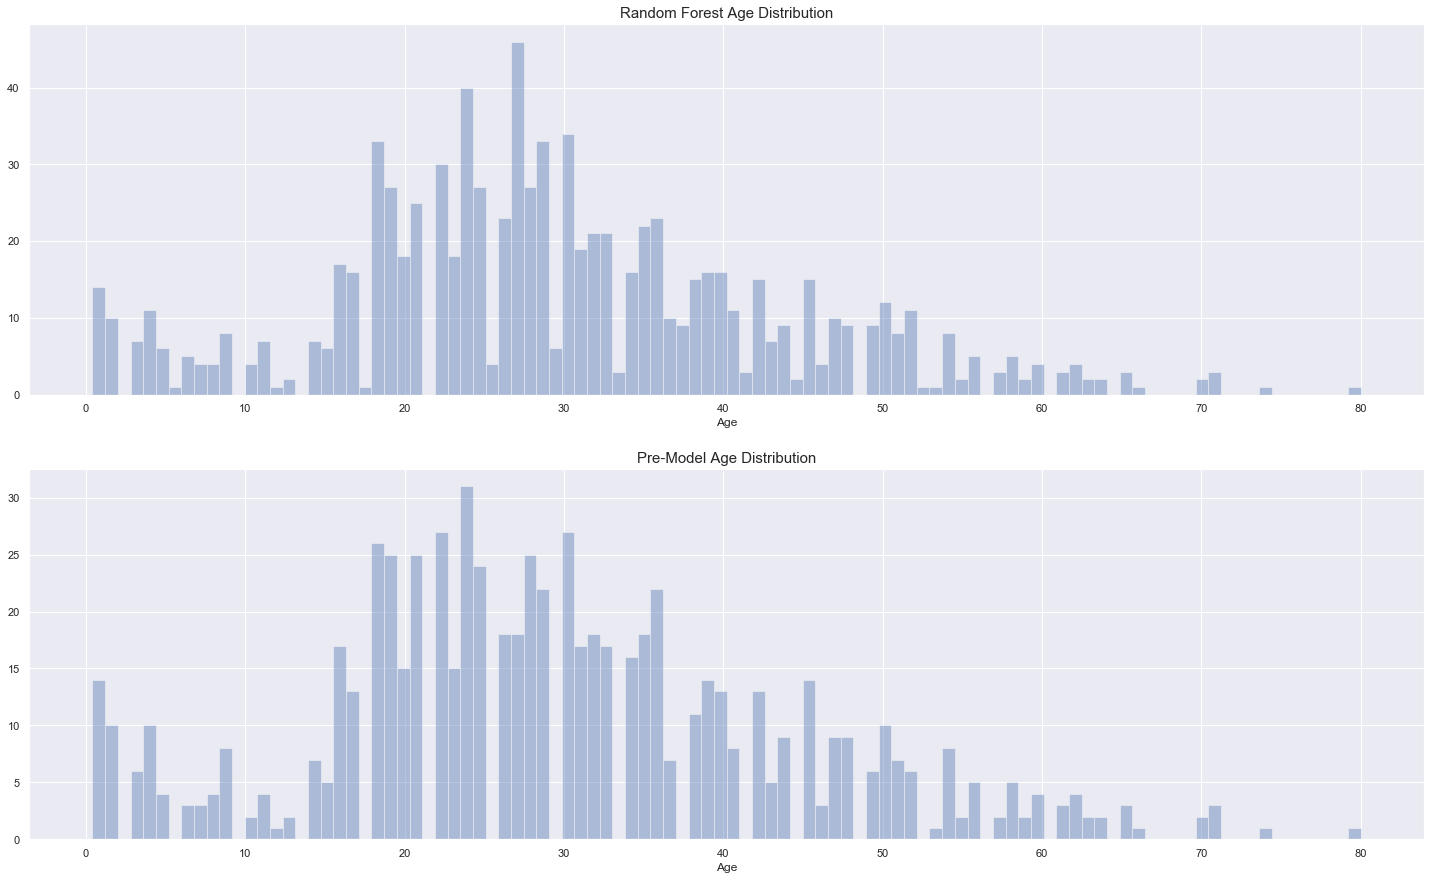

In [338]:
# Create figure space
fig, ax = plt.subplots(figsize=(25,15), ncols=1, nrows=2)

# Create distribution plot with sns.distplot()
ax1 = sns.distplot(mtrain.Age, bins=100, kde=False, rug=False, norm_hist=False, ax=ax[0])
ax2 = sns.distplot(train.Age, bins=100, kde=False, rug=False, norm_hist=False, ax=ax[1])

# Set titles
ax1.set_title('Random Forest Age Distribution', fontsize=15)
ax2.set_title('Pre-Model Age Distribution', fontsize=15)

### Age group bin

Follow all the steps above and write them altogether
1. define the function
2. apply the function to the datasets
3. create dummy variables
4. drop the un-needed features (age)

In [344]:
# Create a function to group ages
def age_group_fun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a

# Apply using the map function
mtrain['age_group'] = mtrain['Age'].map(age_group_fun)
mtest['age_group'] = mtest['Age'].map(age_group_fun)

# Create dummies
mtrain = pd.get_dummies(mtrain, columns=['age_group'], drop_first=True)
mtest = pd.get_dummies(mtest, columns=['age_group'], drop_first=True)

# Drop columns
mtrain.drop('Age', axis=1, inplace=True)
mtest.drop('Age', axis=1, inplace=True)

# Check 
mtrain.head()

,Survived,Sex,SibSp,Parch,is_alone,calc_fare,title_Master,title_Miss,title_Mr,title_Mrs,...,fare_group_mid,fare_group_very low,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,0.0,1,1,0,0,3.62500,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,1.0,0,1,0,0,35.64165,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1.0,0,0,0,1,7.92500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,1,0,0,26.55000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1,0,0,1,8.05000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Pre-modeling tasks
________________________________________________________________________________________

1. Separate dependent and independent variables
2. Split the training data
3. Feature scaling
4. Modeling the data

In [348]:
# Split the variables
y = mtrain['Survived']
x = mtrain.drop(['Survived'], axis=1)

In [349]:
''' 
Split the training data for cross-validation

Split the train data into 4 parts, train_x, test_x, train_y, test_y

    train_x and train_y first used to train the algorithm.
    then, test_x is used in that trained algorithms to predict outcomes.
    Once we get the outcomes, we compare it with test_x

'''
# Import module and pass the data to the train_test_split() function
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33, random_state=0)

### Feature scaling

This is an important concept and it has several methods to achieve this. Since numbers are not in the same scale and can have large effects where the model will read a higher number as better when it is actually not... and more issues. So we need to do feature scaling to get a better result.

Call the StandardScaler() function
1. Use fit_transform() to scale the data
2. Use transform() on all other datasets that will be used

In [350]:
# Import StandardScaler() from preprocessing module
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Transform the train X variable
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

# Transform test set
mtest = sc.transform(mtest)

### Modeling the data

#### List of some classification models:
    
- Logistic Regression
- K-Nearest Neighbors(KNN)
- Gaussian Naive Bayes
- Support Vector Machines
- Decision Tree Classifier
- Bagging on Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
